# Limit Plots

This notebook plots:

- 1D Brazil limit plots which show the observed and expected xsection limits as a function of $m_s$ for a given $m_{\phi}$, T and decay mode.  
- 2D limit plot of the observed excluded mu value as a function of $m_{\phi}$ (x-axis) and T (y-axis). 
- Summary plots: showing the $\mu=1$ exclusion limit for every value of $m_s$ and decay mode.

Using functions in `plot_utils.py`.

Use the Outline to navigate to the desired section.

In [5]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import plot_utils as plot

plt.style.use('physics.mplstyle')
np.seterr(divide='ignore', invalid='ignore')

import mplhep as hep
hep.style.use("CMS")

In [6]:
# parameters
itag = '../approval_debug/'

outDir = '/home/submit/{}/public_html/SUEP/limits/approvalPlots/'.format(os.environ['USER'])
outDirAN = '/home/submit/{}/SUEP/AN-22-133/images/offline/'.format(os.environ['USER'])
outDirPaper = '/home/submit/{}/SUEP/EXO-23-002/images/'.format(os.environ['USER'])

saveToAN = False
saveToPaper = False

if not os.path.isdir(outDir): os.mkdir(outDir)

## 1D Limits: $m_S$ scan

In [22]:
import uproot

file =uproot.open("../approval_debug_rScale2/higgsCombineGluGluToSUEP_HT1000_T3p00_mS2000.000_mPhi3.000_T3.000_modegeneric_TuneCP5_13TeV-pythia8.HybridNew.mH125.quant0.025.root")
file.keys()
file['limit']['limit'].array()

DeserializationError: attempting to get bytes 8587921696272561454:8587921696272561480
outside expected range 8587921696272561454:6189 for this Chunk
in file ../approval_debug_rScale2/higgsCombineGluGluToSUEP_HT1000_T3p00_mS2000.000_mPhi3.000_T3.000_modegeneric_TuneCP5_13TeV-pythia8.HybridNew.mH125.quant0.025.root

In [21]:
#toysNoScale = plot.get_scan_limits(method='HybridNew', ms=2000, temp=3, mphi=3, decay='generic', path='../approval_debug_noScale/')[0][1][1]
toysScale = plot.get_scan_limits(method='HybridNew', ms=2000, temp=3, mphi=3, decay='generic', path='../approval_debug_rRelAcc0p01/')[0][1][1]

#print(toysNoScale)
print(toysScale)

[2.55826055e-05 2.50530420e-05 2.40187978e-05 2.42280425e-05
 2.42409425e-05 2.51271578e-05]


+--------------+--------------+--------------+--------------+--------------+--------------+---------------+
|      mS      |     Obs      |   -2 Sigma   |   -1 Sigma   |     Exp      |   +1 Sigma   |    +2 Sigma   |
+--------------+--------------+--------------+--------------+--------------+--------------+---------------+
| 125.0000000  | 1469.0000000 | 1469.0000000 | 1796.0072881 | 2641.4853957 | 4025.5173893 | 10717.3418877 |
| 200.0000000  |  89.5755812  |  29.0468750  |  42.0622159  |  57.0779242  |  83.0176364  |  114.7808078  |
| 300.0000000  |  0.5410960   |  0.4183105   |  0.5907810   |  0.8072542   |  1.1570489   |   1.5126696   |
| 400.0000000  |  0.0498770   |  0.0212158   |  0.0373076   |  0.0502401   |  0.0699586   |   0.0929559   |
| 500.0000000  |  0.0122658   |  0.0039139   |  0.0084824   |  0.0117638   |  0.0169203   |   0.0242643   |
| 600.0000000  |  0.0025308   |  0.0019836   |  0.0024946   |  0.0029503   |  0.0034547   |   0.0041206   |
| 700.0000000  |  0.0014378 

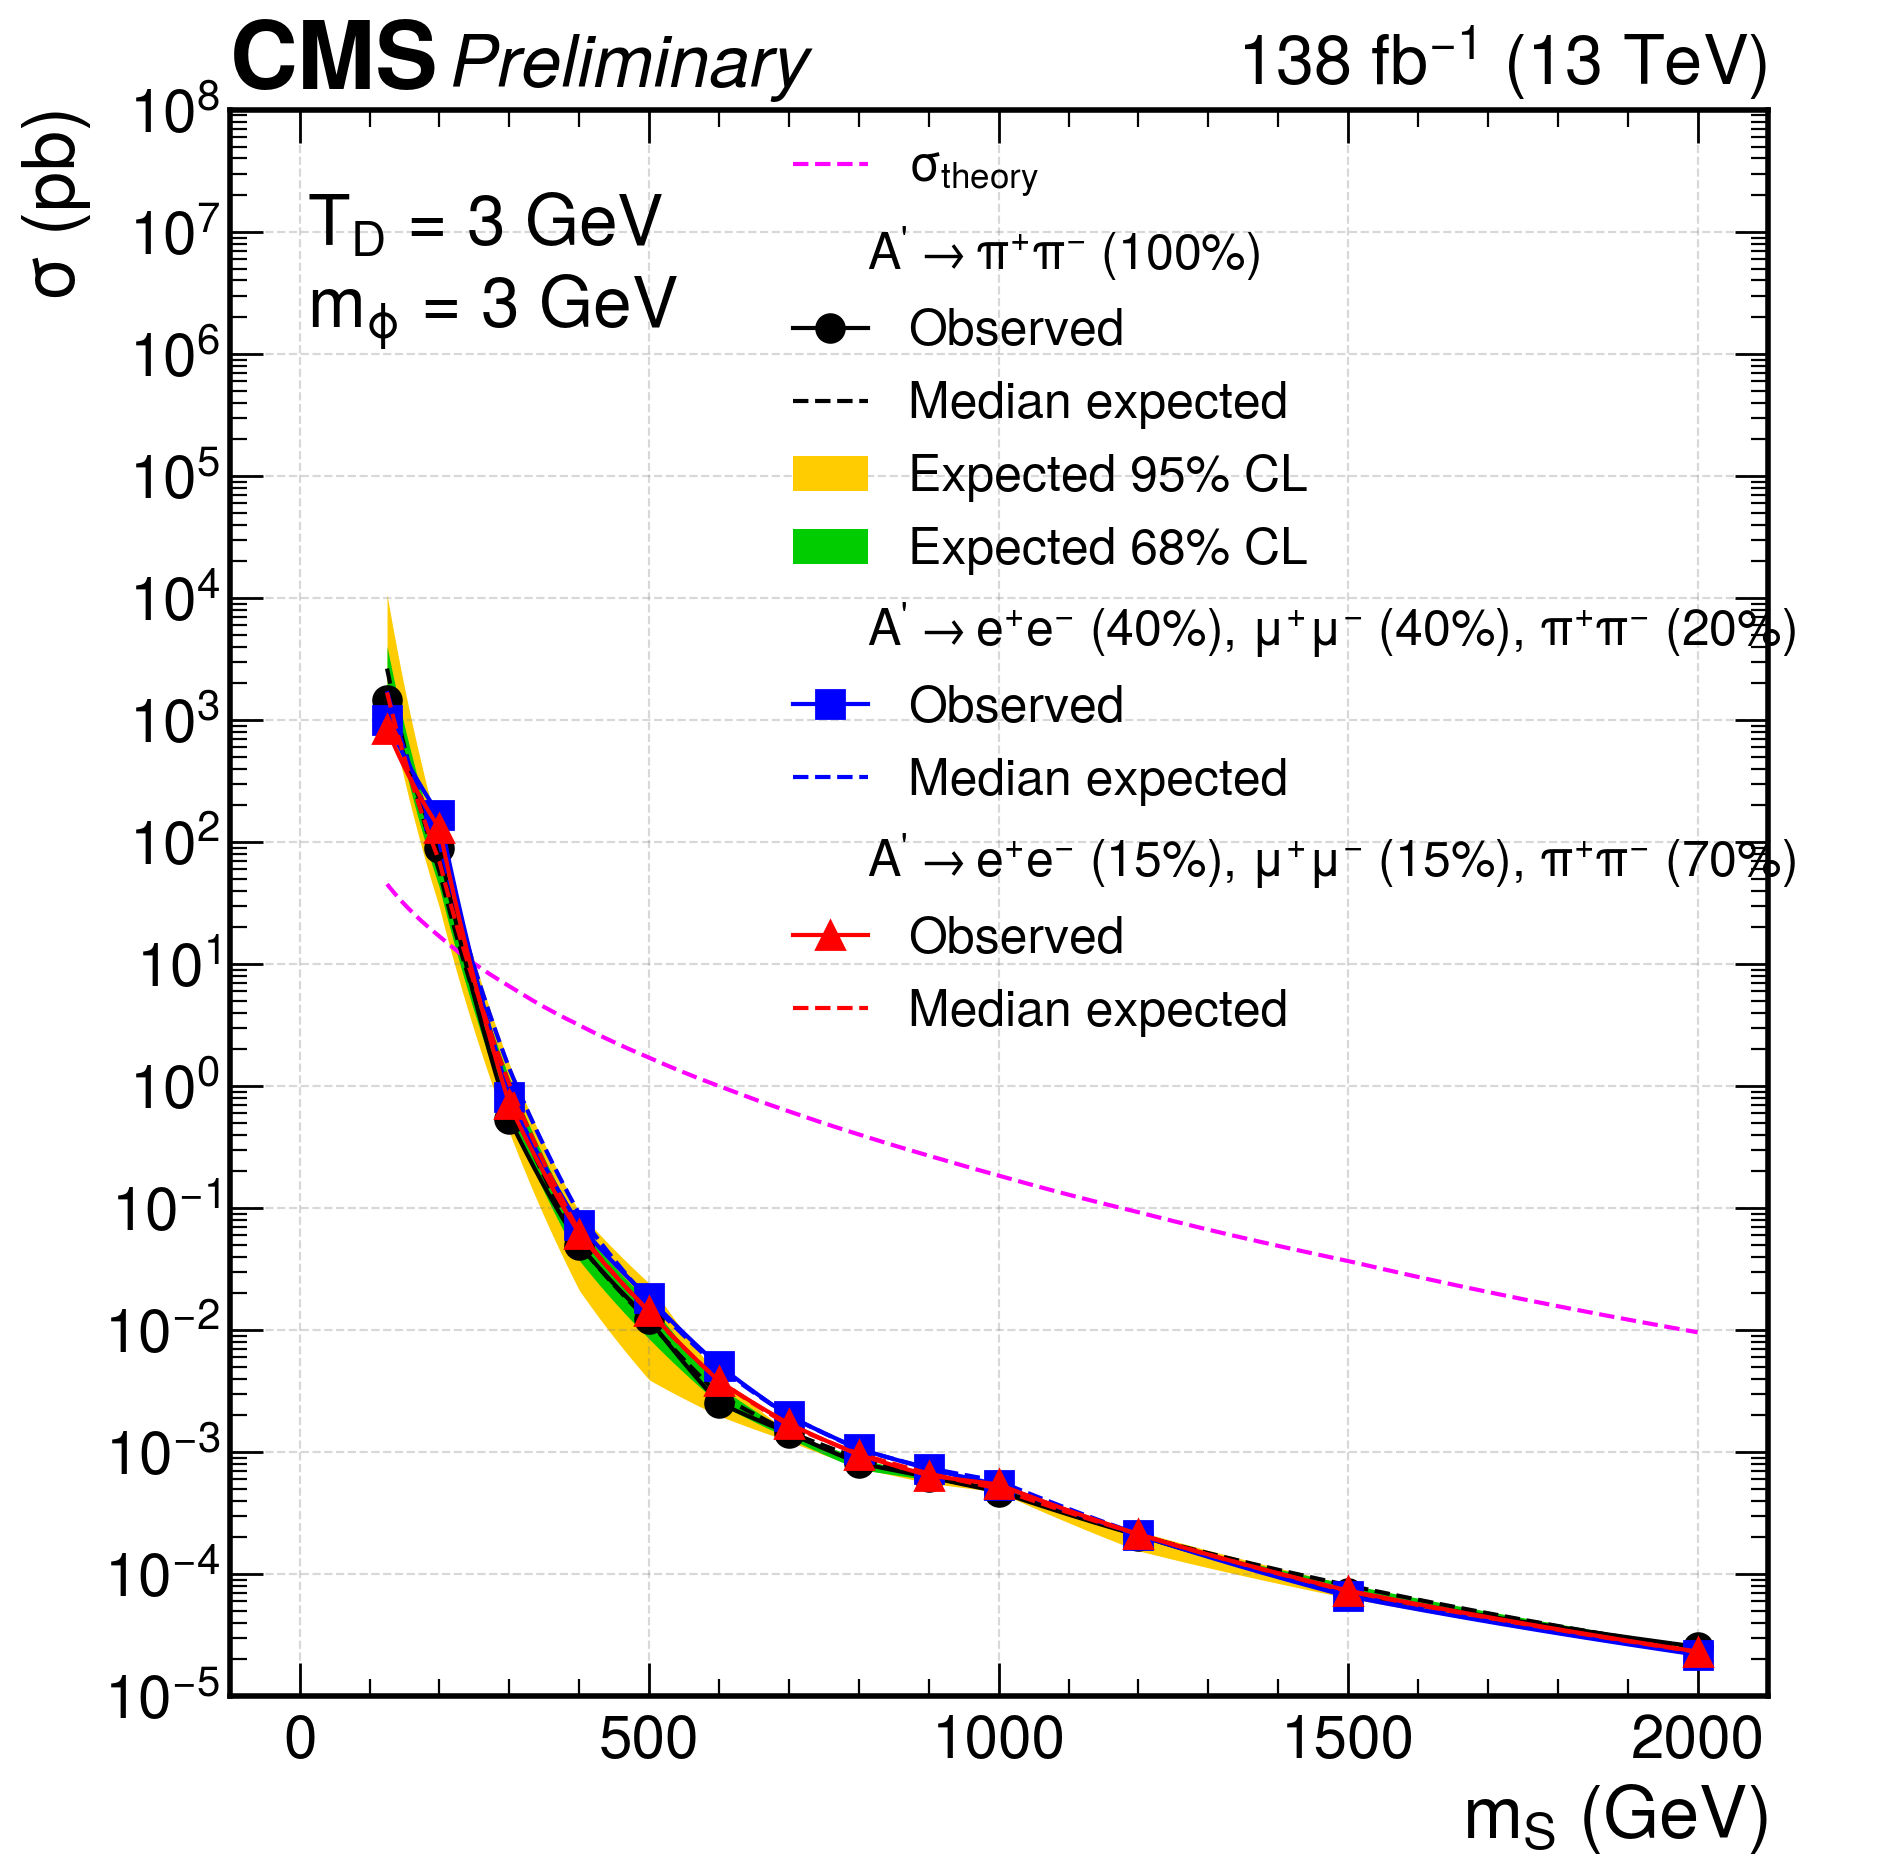

In [32]:
# example usage of the 1D limits mS scan
temp = 3
mphi = 3
fig = plot.ms_limits_all_decays(temp=temp, mphi=mphi, ref_decay='generic', path=itag, verbose=True, method='HybridNew')
fig.axes[0].set_ylim(1e-5, 1e8)
fig.savefig(outDir + fig.get_label() + '.pdf')

In [6]:
# return all combinations of (mphi, temp, decay)
combinations = plot.get_unique_combinations(['ms'])

# plot all combinations, and save the plots
for i, combination in enumerate(combinations):
    # if i > 3: break # testing
    print(combination)
    try:
        fig = plot.plot_ms_limits(temp=combination[1], mphi=combination[0], decay=combination[2], verbose=False, path=itag)
        plotName = "/limits1D_T{}_mphi{}_{}.pdf".format(combination[1],combination[0],combination[2])
        fig.savefig(outDir+plotName, bbox_inches='tight')
    except Exception as e:
        print("Combination failed", e)
    if saveToAN: fig.savefig(outDirAN+plotName, bbox_inches='tight')
    if saveToPaper: fig.savefig(outDirPaper+plotName, bbox_inches='tight')
    
    # toggle this if you're running many plots that you only want to save
    plt.close()

[1.0, 0.25, 'leptonic']
'path' must be a string, pathlib.Path, an object with 'read' and 'seek' methods, or a length-1 dict of {file_path: object_path}, not None
File doesn't exit None
'path' must be a string, pathlib.Path, an object with 'read' and 'seek' methods, or a length-1 dict of {file_path: object_path}, not None
File doesn't exit None
'path' must be a string, pathlib.Path, an object with 'read' and 'seek' methods, or a length-1 dict of {file_path: object_path}, not None
File doesn't exit None
'path' must be a string, pathlib.Path, an object with 'read' and 'seek' methods, or a length-1 dict of {file_path: object_path}, not None
File doesn't exit None
'path' must be a string, pathlib.Path, an object with 'read' and 'seek' methods, or a length-1 dict of {file_path: object_path}, not None
File doesn't exit None
'path' must be a string, pathlib.Path, an object with 'read' and 'seek' methods, or a length-1 dict of {file_path: object_path}, not None
File doesn't exit None
'path' mus

## 2D Limits: $m_{\phi}$, T scan

In [9]:
from matplotlib import ticker
import pandas as pd
import math

def test_plot_mPhi_temp_limits(ms:int, decay:str, path:str, tricontour:str ='log', calculateWithoutPlotting=False, showPoints=False, method='AsymptoticLimits'): 
    """
    Make 2D limit plot for some choice of mS and decay, scanning over T and mPhi.
    Inputs:
        mS: scalar mass
        decay: decay channel
        path: path to the directory containing the higgsCombined files
        tricontour: 'log' or 'lin' to interpolate through log(mu) or mu
        calculateWithoutPlotting: if True, the function returns the interpolated limits without plotting them
        showPoints: shows were the actual samples are
    Outputs:
        fig: figure object
    """
    
    if tricontour not in ['log','lin']: #tricontour decides whether we interpolate through mu ('lin') or log(mu) ('log')
        raise Exception("tricontour should be 'log' or 'lin'")

    scan_limits = plot.get_scan_limits(path=path, ms=ms, decay=decay, method=method)
        
    # Reorganize data
    if calculateWithoutPlotting: limit_mu = np.stack([s[1]/s[0][-1] for s in scan_limits]) 
    else: limit_mu = np.stack([s[1] for s in scan_limits]) 
    limit_mphi = np.array([s[0][1] for s in scan_limits]) 
    limit_temp =  np.array([s[0][2] for s in scan_limits])

    if tricontour == 'log':
        limit_mu[:,1,:]= np.log10(limit_mu[:,1,:]) # Convert mu to logarithm of mu 
    
    data = pd.DataFrame(
        {
            "mH"  : np.array(limit_temp),
            "ma"  : np.array(limit_mphi),
            "m2s" : np.array(limit_mu)[:,1,0],
            "m1s" : np.array(limit_mu)[:,1,1],
            "exp" : np.array(limit_mu)[:,1,2],
            "p1s" : np.array(limit_mu)[:,1,3],
            "p2s" : np.array(limit_mu)[:,1,4],
            "obs" : np.array(limit_mu)[:,1,5],
        }
    )
    
    # Plot figure and obtain mu=1 (log(mu)=0) lines
    fig = plt.figure(figsize=(10,10))
    ax = fig.subplots()
    
    if tricontour == 'log':
        levels = np.linspace(min(data['obs']),max(data['obs']))
        contour = ax.tricontourf(limit_mphi, limit_temp, data['obs'], levels =levels, cmap="plasma")
        cb = fig.colorbar(contour)
        cb.ax.set_ylabel(r'$95\%$ CL obs. upper limit on $\sigma$ (pb)', loc='top', rotation=90, fontsize=25)
        ticks = (np.array(range(math.ceil(min(data['obs'])), math.floor(max(data['obs'])) + 1)))
        cb.set_ticks(ticks)
        labels = ['$10^{'+str(i)+'}$' for i in ticks]
        cb.set_ticklabels(labels)      

    if tricontour == 'lin':
        levels = np.logspace(np.log10(min(data['obs'])),np.log10(max(data['obs'])))
        x = ax.tricontourf(limit_mphi, limit_temp, data['obs'], levels =levels,locator=ticker.LogLocator(), cmap="plasma")
        formatter = ticker.LogFormatter(base=10, labelOnlyBase=True) 
        cb = fig.colorbar(x, format=formatter, label=r'$\mu$')
        cb.ax.set_ylabel(r'$95\%$ CL obs. upper limit on $\sigma$ (pb)', loc='top', rotation=90, fontsize=25)
        cb.locator = ticker.LogLocator(base=10.0, subs=[1.0], numdecs=7, numticks=45)
        cb.update_ticks()
     
    
    # Obtain values for expected mu=1 line
    
    # NOTE: suppressing +- 2 sigma (p0 and p4)
    # p0 = ax.tricontour(limit_mphi, limit_temp, limit_mu[:,1,0],levels=[0,1], colors="k", alpha=0) # -2 sigma expected
    p1 = ax.tricontour(limit_mphi, limit_temp, limit_mu[:,1,1],levels=[0,1],   colors="k", alpha=0) # -1 sigma expected
    p2 = ax.tricontour(limit_mphi, limit_temp, limit_mu[:,1,2],levels=[0,1],   colors="k", alpha=0) # median expected
    p3 = ax.tricontour(limit_mphi, limit_temp, limit_mu[:,1,3],levels=[0,1],  colors="k", alpha=0) # +1 sigma expected
    # p4 = ax.tricontour(limit_mphi, limit_temp, limit_mu[:,1,4],levels=[0,1],  colors="k", alpha=0) # +2 sigma expected
    p5 = ax.tricontour(limit_mphi, limit_temp, limit_mu[:,1,5],levels=[0,1],  colors="k", alpha=0) # observed

    if showPoints:
        ax.scatter(limit_mphi, limit_temp, marker='o', color='black', label='Signal point', s=10)
    
    if tricontour == 'log': x=0
    if tricontour == 'lin': x=1 
    # line0 = np.array(p0.collections[x].get_paths()[0].vertices)
    line1 = np.array(p1.collections[x].get_paths()[0].vertices)
    line2 = np.array(p2.collections[x].get_paths()[0].vertices)
    line3 = np.array(p3.collections[x].get_paths()[0].vertices)
    # line4 = np.array(p4.collections[x].get_paths()[0].vertices)
    line5 = np.array(p5.collections[x].get_paths()[0].vertices)

    if calculateWithoutPlotting:
        plt.close()
        return line1, line2, line3, line5

    #plot smoothed curve
    ax.plot(*line2.T, linestyle = "--", color ='red' , label=r"Median expected",linewidth =4)
    ax.plot(*line1.T,linestyle = "--", color='#00ffff', label=r"Expected $68\%$ CL",linewidth =4)
    ax.plot(*line3.T, linestyle = "--", color='#00ffff', linewidth =4)
    ax.plot(*line5.T, linestyle = "-", color='#00008b', label=r"Observed",linewidth =4)
        
    ax.set_xlabel(r"$m_{\phi}$ (GeV)", x=1, ha='right')
    ax.set_ylabel(r"$T_D$ (GeV)", y=1, ha='right')
    
    hep.cms.label(llabel='Preliminary', data=True, lumi=plot.lumis['combined'], ax=ax) # To add CMS lumi scripts
    
    _ = ax.text(
        0.05, 0.85, r"$m_{{s}} = {}$ GeV""\n""{}".format(str(ms), plot.decaysLabels[decay]),
        fontsize=20, horizontalalignment='left', 
        verticalalignment='bottom', 
        transform=ax.transAxes
    )
    
    ax.set_xlim([1, 8.5])
    ax.set_ylim([0, 35])     
    ax.legend(loc="upper right", fontsize=20)
    fig.tight_layout()
    
    fig.set_label("color_T_mdark_2D_limits_m{:.1f}".format(ms))
     
    return fig

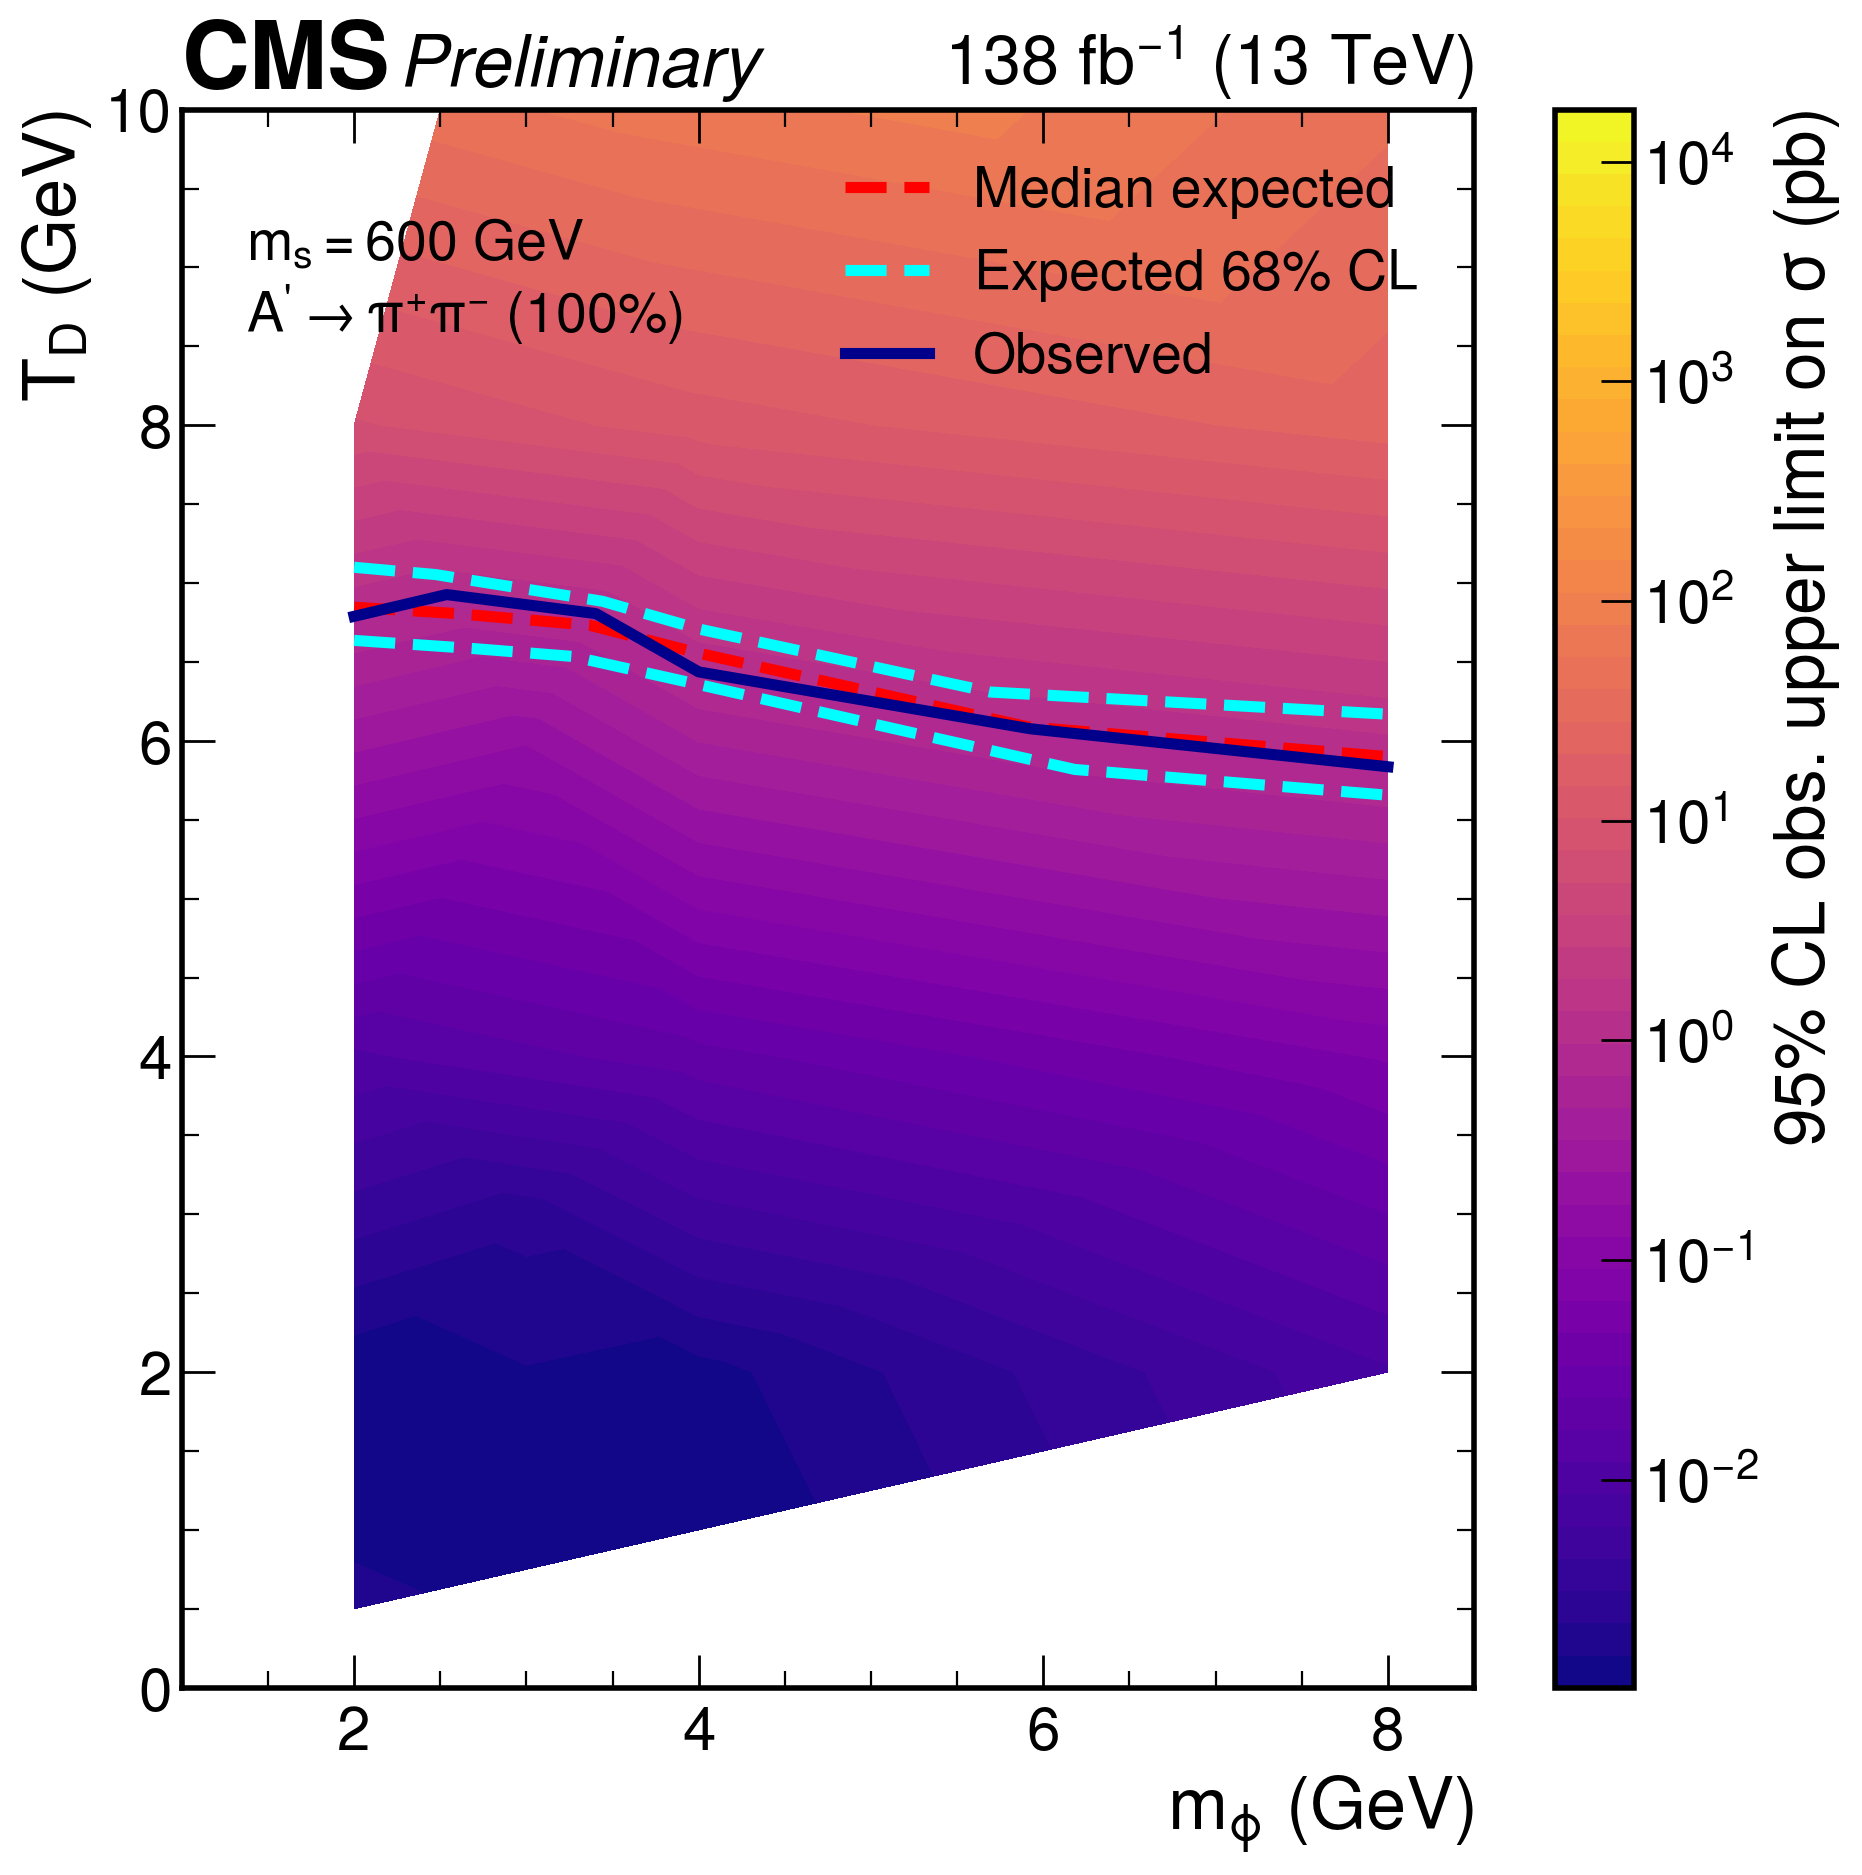

In [35]:
# example usage of the 2D limits function
fig = test_plot_mPhi_temp_limits(ms=600, decay='generic', tricontour='log', path=itag, showPoints=False, method='HybridNew')
fig.axes[0].set_ylim(0,10)
fig.savefig(outDir + fig.get_label() + '.pdf')

In [20]:
# return all combinations of (mS, decay)
combinations = plot.get_unique_combinations(['mphi', 'temp'])

for i, combination in enumerate(combinations):
    # if i > 3: break # testing
    print(combination)
    try:
        fig = plot.plot_mPhi_temp_limits(ms=combination[0], decay=combination[1], tricontour='log', path=itag)
        plotName = "color_T_mdark_2D_limits_m{}_{}.pdf".format(combination[0], combination[1])
        fig.savefig(outDir+plotName, bbox_inches='tight')
    except Exception as e:
        print("Combination failed", e)
    if saveToAN: fig.savefig(outDirAN+plotName, bbox_inches='tight')
    if saveToPaper: fig.savefig(outDirPaper+plotName, bbox_inches='tight')

    plt.close()

[125.0, 'leptonic']
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T12p0_mS125.000_mPhi3.000_T12.000_modeleptonic_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T16p0_mS125.000_mPhi8.000_T16.000_modeleptonic_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T32p0_mS125.000_mPhi8.000_T32.000_modeleptonic_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
[200.0, 'leptonic']
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T32p0_mS200.000_mPhi8.000_T32.000_modeleptonic_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
[300.0, 'leptonic']
[400.0, 'leptonic']
[500.0, 'leptonic']
[600.0, 'leptonic']
[700.0, 'leptonic']
[800.0, 'leptonic']
[900.0, 'leptonic']
[1000.0, 'leptonic']
[125.0, 'hadronic']
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T16p0_mS125.000_mPhi8.000_T16.000_modehadronic_TuneCP5_13TeV-pythia8.AsymptoticLi

## Summary plots: $m_{\phi}$, T scan with $\mu$=1 lines for each $m_S$

In [29]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

def test_plot_summary_limits_mPhi_temp(decay, path='../', method='AsymptoticLimits'):
    
    samples = plot.get_unique_combinations(['mphi', 'temp'], decay=decay)
    
    # sort by mS
    samples = np.array(samples)[np.argsort([s[0] for s in samples])]
            
    lines = []
    for sample in samples:
        lines.append(test_plot_mPhi_temp_limits(ms=float(sample[0]), decay=decay, 
                                    tricontour='log', path=path,
                                    calculateWithoutPlotting=True, method=method)) 
    # Define colours
    cmap = plt.cm.jet
    colors = cmap(np.linspace(0, 1, len(lines)))

    # Plot mu=1 lines 
    fig = plt.figure(figsize=(16,9))
    ax = fig.subplots()
    
    mA = {'leptonic':0.5,'hadronic':0.7,'generic':1.0}
    x=np.array([2*mA[decay],8])

    legend_elements = []
    legend_labels = []
    legend_elements.append(Line2D([0],[0], linestyle = '-',c='black'))
    legend_labels.append('Observed')
    legend_elements.append(Line2D([0],[0], linestyle = '-',c='white'))
    legend_labels.append('Expected (median, 68%):')
    for i, line in enumerate(lines):
        line1,line2,line3,line5 = line
        x1,y1 = plot.interpLimit(line1, 4) 
        x2,y2 = plot.interpLimit(line2, 4)
        x3,y3 = plot.interpLimit(line3, 4)
        x5,y5 = plot.interpLimit(line5, 4)

        _expline, = ax.plot(x2,y2, linestyle = '--', lw=2, c=colors[i])
        ax.plot(x5,y5, linestyle = '-',c='black')

        y1_interp = np.interp(x2, x1, y1)
        y3_interp = np.interp(x2, x3, y3)
        
        upper_bound = np.minimum(x2*4, y3_interp)
        
        band = ax.fill_between(x2, y1_interp, upper_bound, color=colors[i],alpha=0.2)
        legend_elements.append((mpatches.Patch(facecolor=colors[i], alpha=0.2), _expline))
        legend_labels.append('$m_{{S}}$ = {} GeV'.format(round(float(samples[i][0]))))

    # Annotate figure
    ax.set_xlabel(r"$m_{\phi}$ (GeV)", x=1, ha='right')
    ax.set_ylabel(r"$T_D$ (GeV)", y=1, ha='right')
    hep.cms.label(llabel='Preliminary', data=False, lumi=plot.lumis['combined'], ax=ax) # To add CMS lumi scripts
    ax.text(7.7, 14, plot.decaysLabels[decay], horizontalalignment='right', verticalalignment='center',fontsize=18)

    # Plot theoretically excluded regions
    ax.plot(x, [4 * xi for xi in x], '--',color='black')
    ax.plot(x, [0.25 * xi for xi in x], '--',color='black')
    ax.plot([2*mA[decay]]*50, np.linspace(0.5,15,50),color='black',marker=(1,2,45),markersize =20, alpha =0.5)
    ax.plot([8]*50, np.linspace(0.5,15,50),color='black',marker=(1,2,-135),markersize =30, alpha =0.5)
    ax.text(8.4, 5, 'few hard tracks', horizontalalignment='right', verticalalignment='center',fontsize=16,rotation=-90)
    ax.text(2*mA[decay]-0.15, 5, r"$m_{\phi}<2m_{A^'}$", horizontalalignment='right', verticalalignment='center',fontsize=20,rotation=-90)
    ax.text(3, 11.5, r'$T_D/m_{\phi}=4$', horizontalalignment='right', verticalalignment='center',fontsize=20,rotation =55)
    ax.text(6, 0.75, r'$T_D/m_{\phi}=0.25$', horizontalalignment='right', verticalalignment='center',fontsize=20,rotation =6)

    ax.set_xlim([2*mA[decay]-0.6, 12])
    ax.set_ylim([0.0, 15])
    
    leg = ax.legend(legend_elements, legend_labels, loc=(0.70, 0.05), fontsize=20, handler_map = {legend_elements[0] : HandlerLine2D(marker_pad = 0)})
    
    for item, label in zip(leg.legendHandles, leg.texts):
        if "Expected" in label._text:
            width=item.get_window_extent(fig.canvas.get_renderer()).width
            label.set_ha('left')
            label.set_position((-1.5*width,0))
    
    fig.tight_layout()
    
    fig.set_label('2D_summary_limits_{}'.format(decay))

    return fig

'path' must be a string, pathlib.Path, an object with 'read' and 'seek' methods, or a length-1 dict of {file_path: object_path}, not None
File doesn't exit None
'path' must be a string, pathlib.Path, an object with 'read' and 'seek' methods, or a length-1 dict of {file_path: object_path}, not None
File doesn't exit None


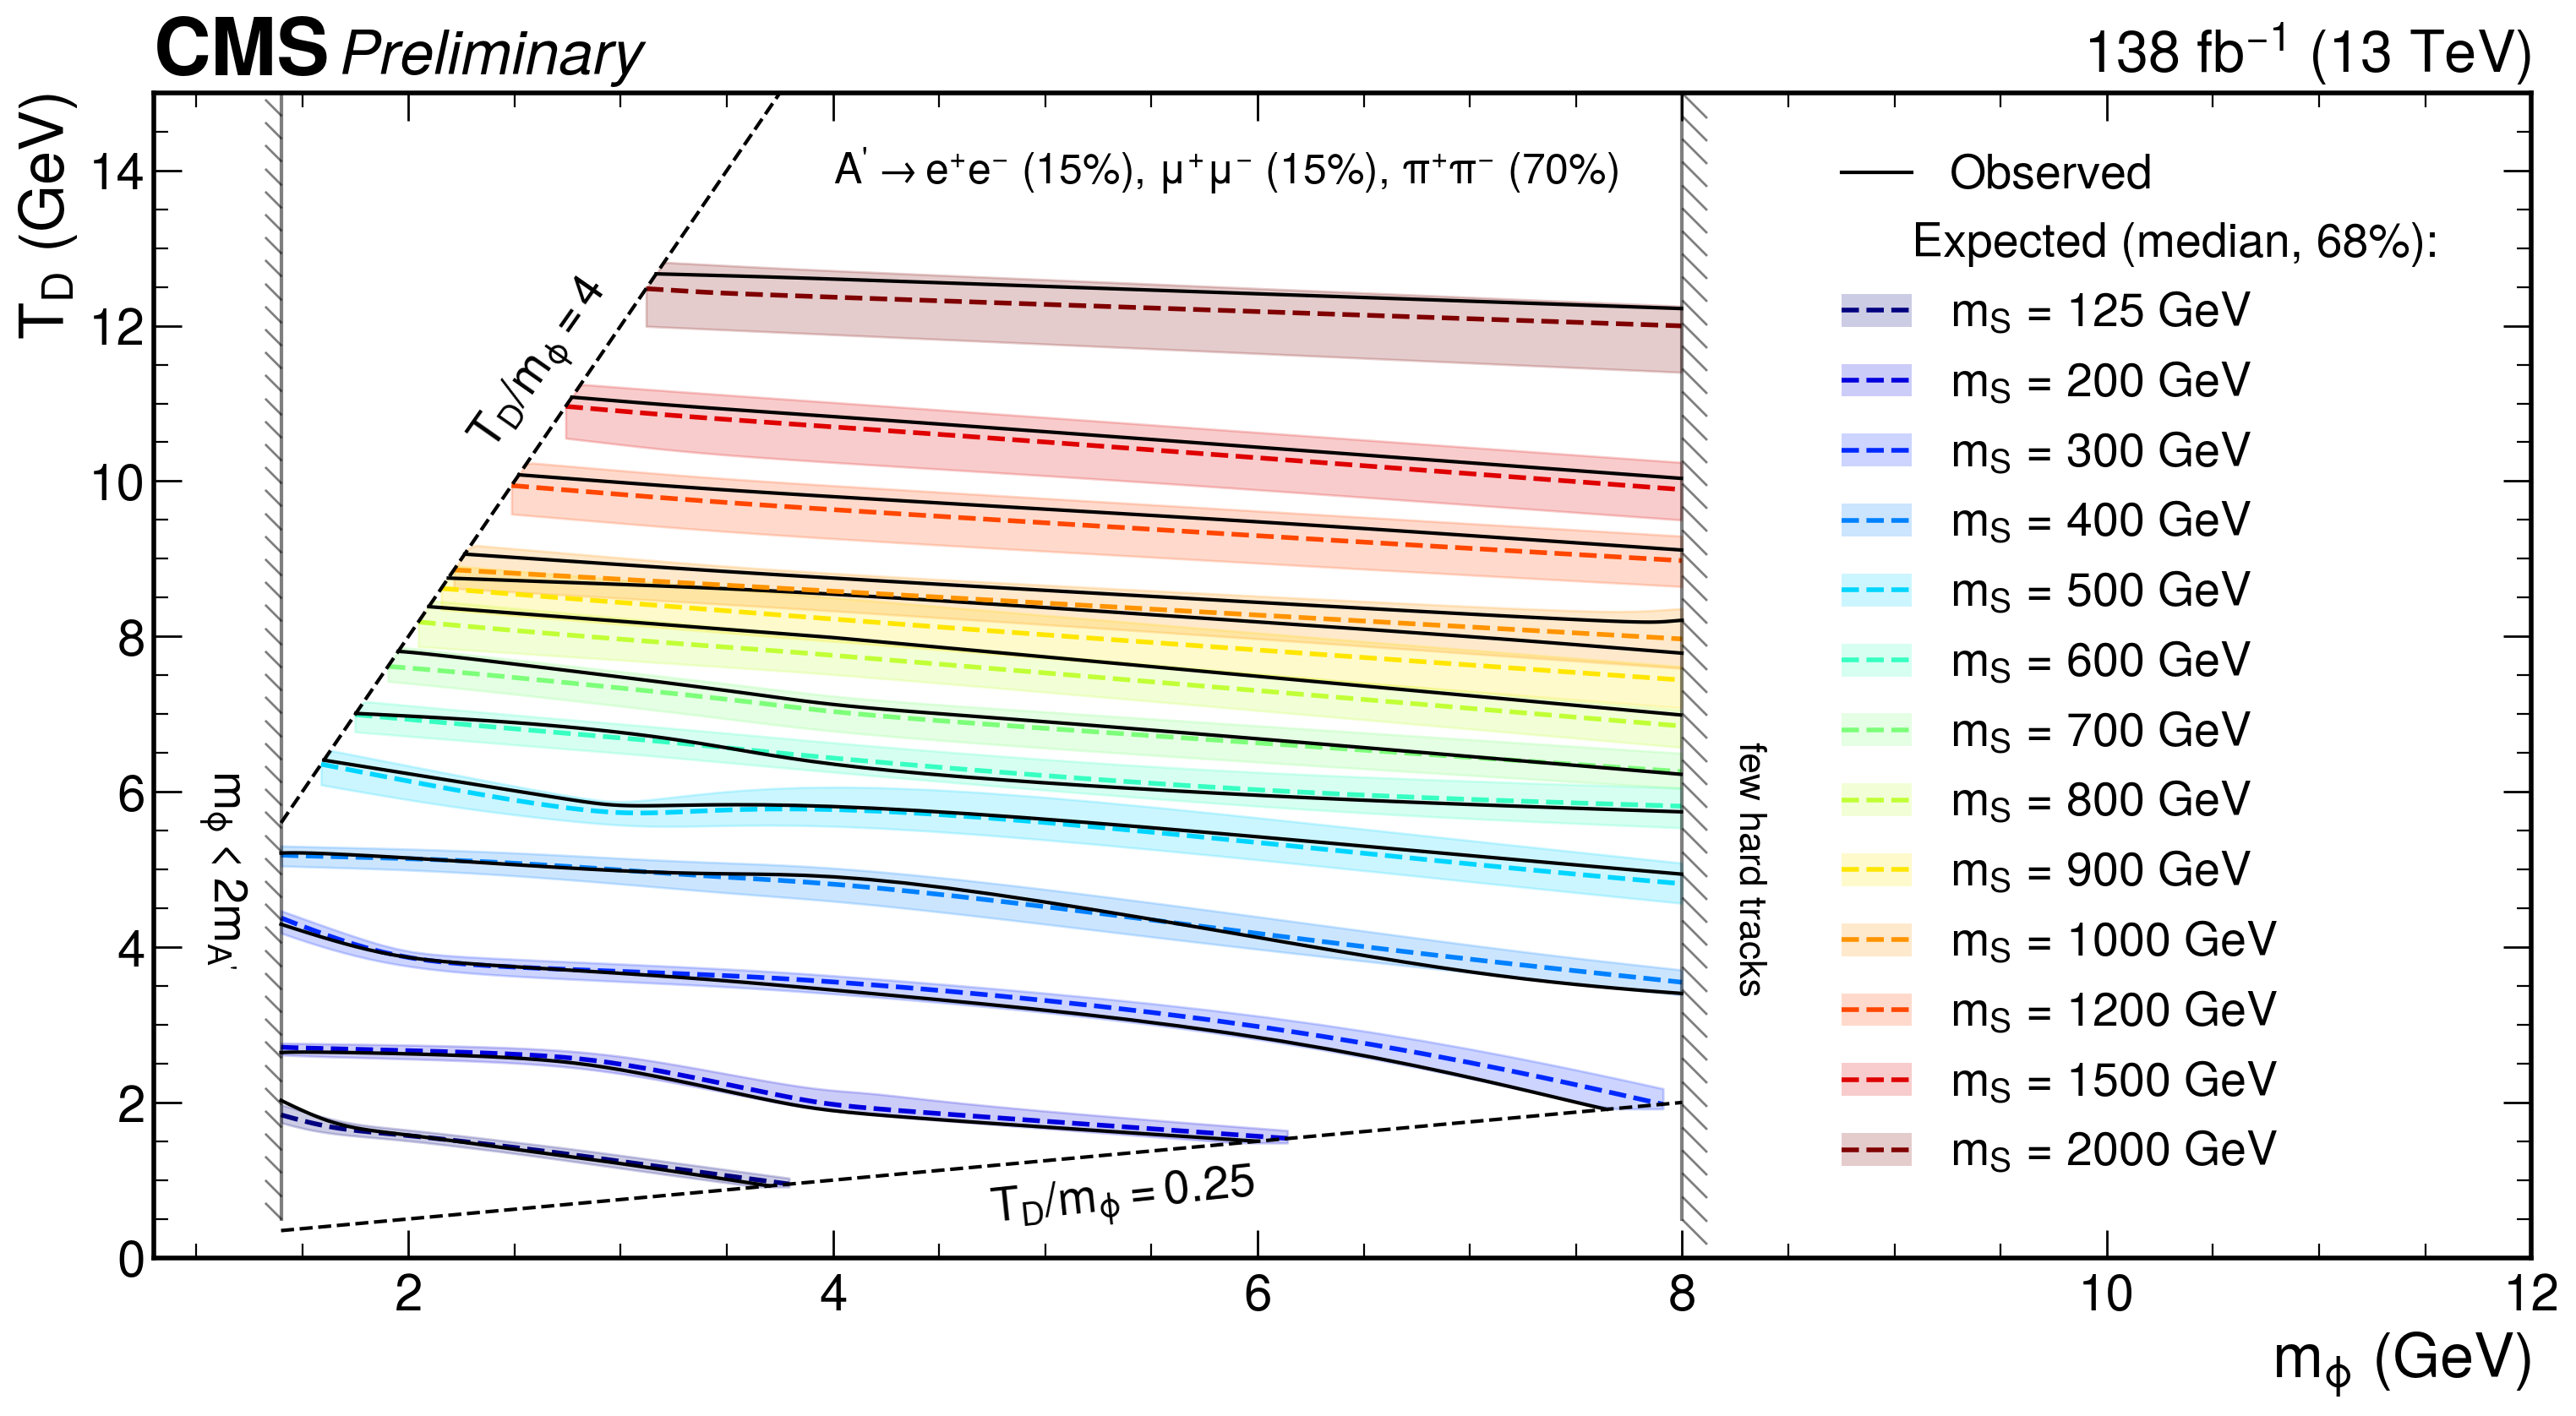

In [32]:
# example usage
fig = test_plot_summary_limits_mPhi_temp(decay='hadronic', path='../approval/', method='HybridNew')
fig.savefig(outDir + fig.get_label() + '.pdf')

['leptonic']
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T12p0_mS125.000_mPhi3.000_T12.000_modeleptonic_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T16p0_mS125.000_mPhi8.000_T16.000_modeleptonic_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T32p0_mS125.000_mPhi8.000_T32.000_modeleptonic_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T32p0_mS200.000_mPhi8.000_T32.000_modeleptonic_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Combination failed [Errno 2] No such file or directory: '/home/submit/lavezzo/public_html/SUEP/analysis/allYears_720_v5/2D_summary_limits_leptonic.pdf'
['hadronic']
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T16p0_mS125.000_mPhi8.000_T16.000_modehadronic_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Bad limits ../allYears_720_

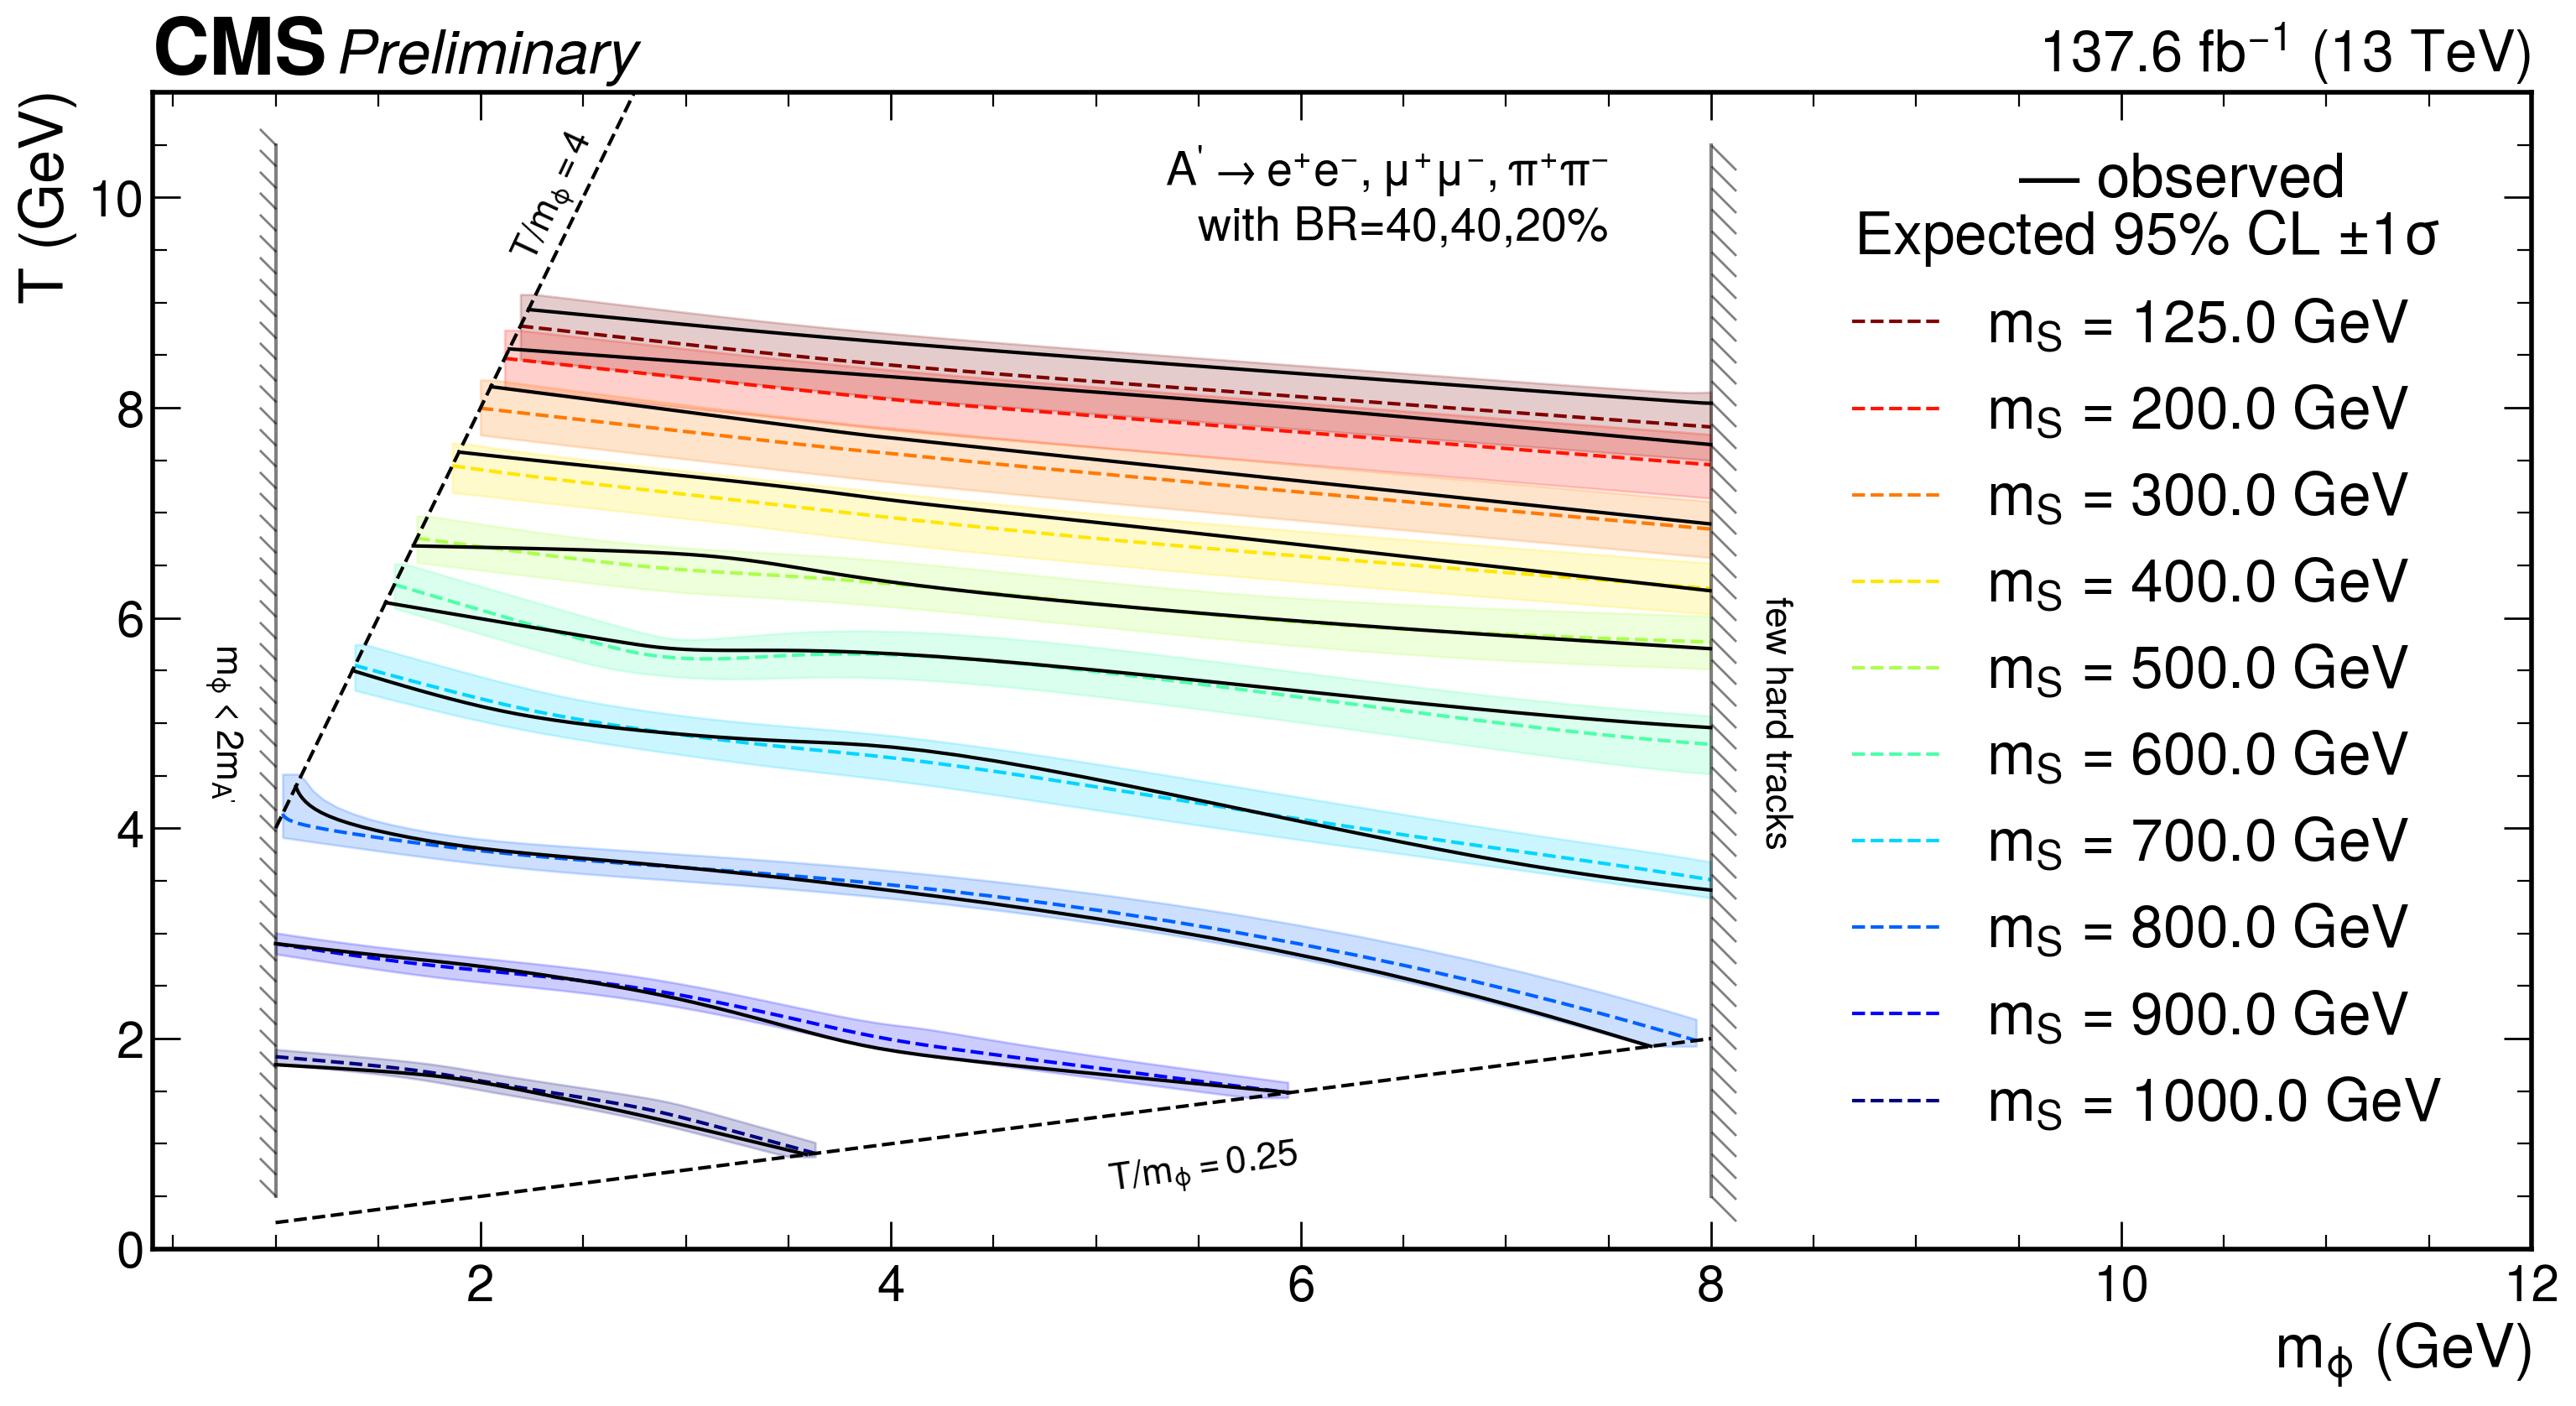

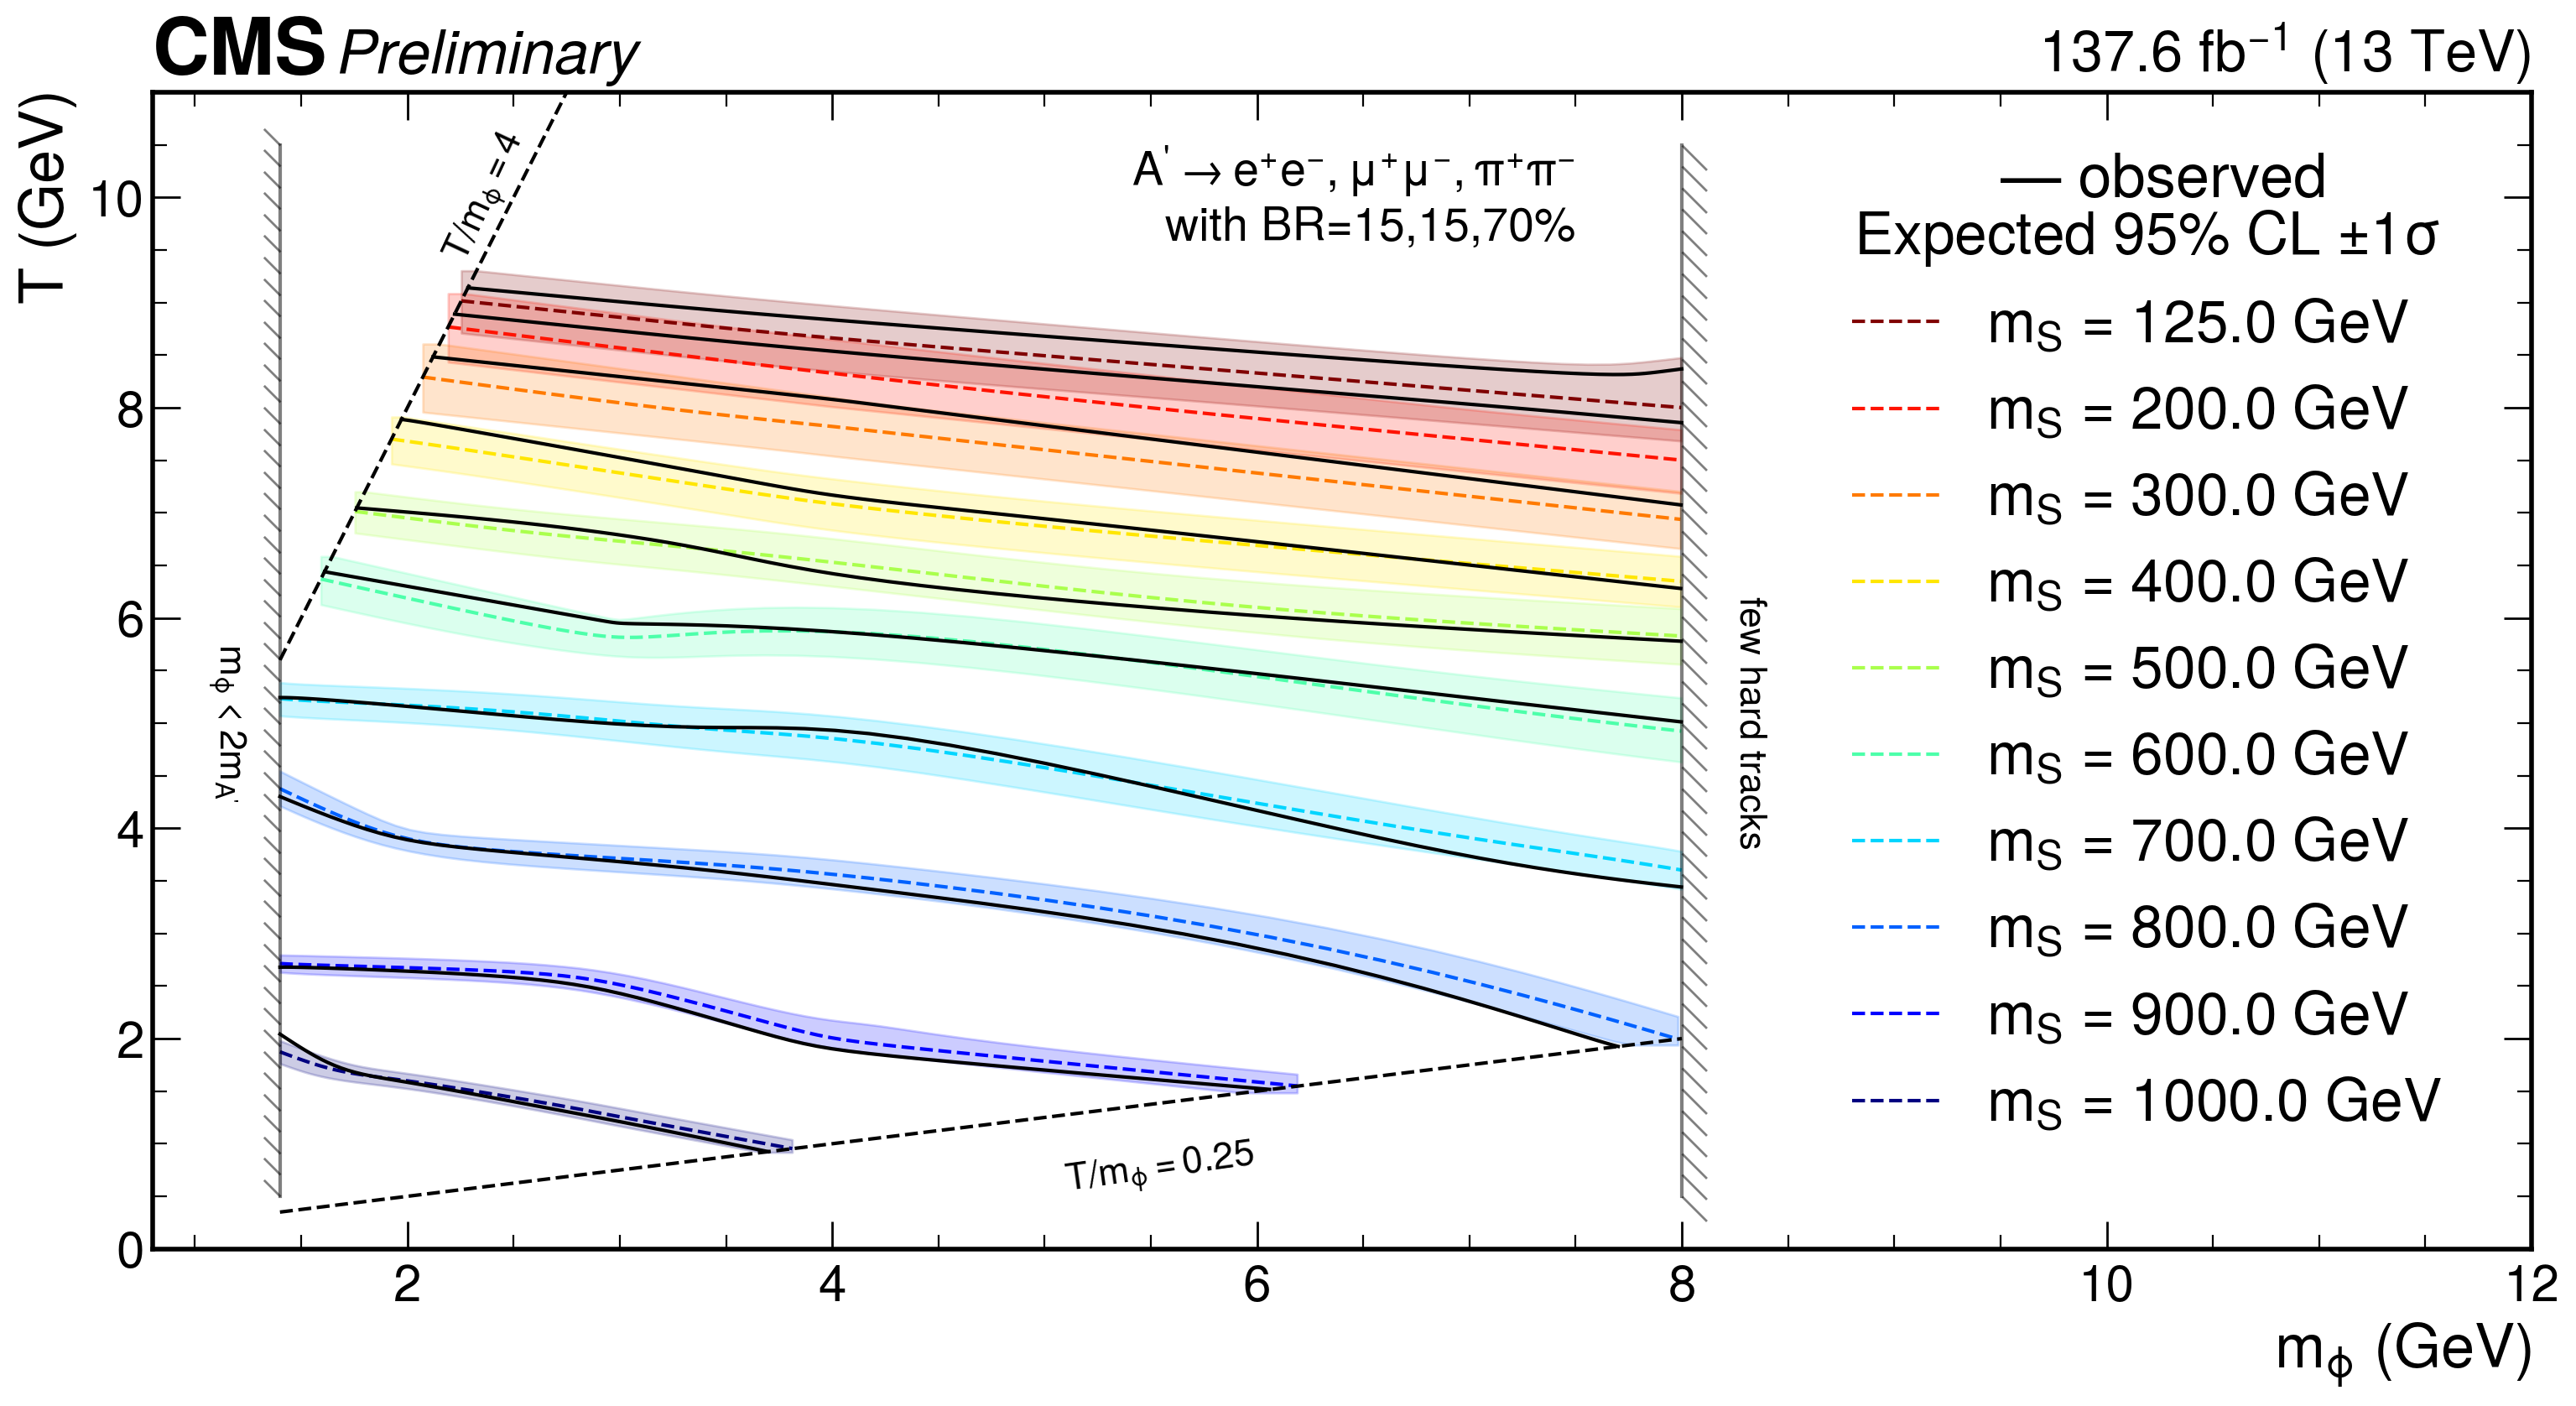

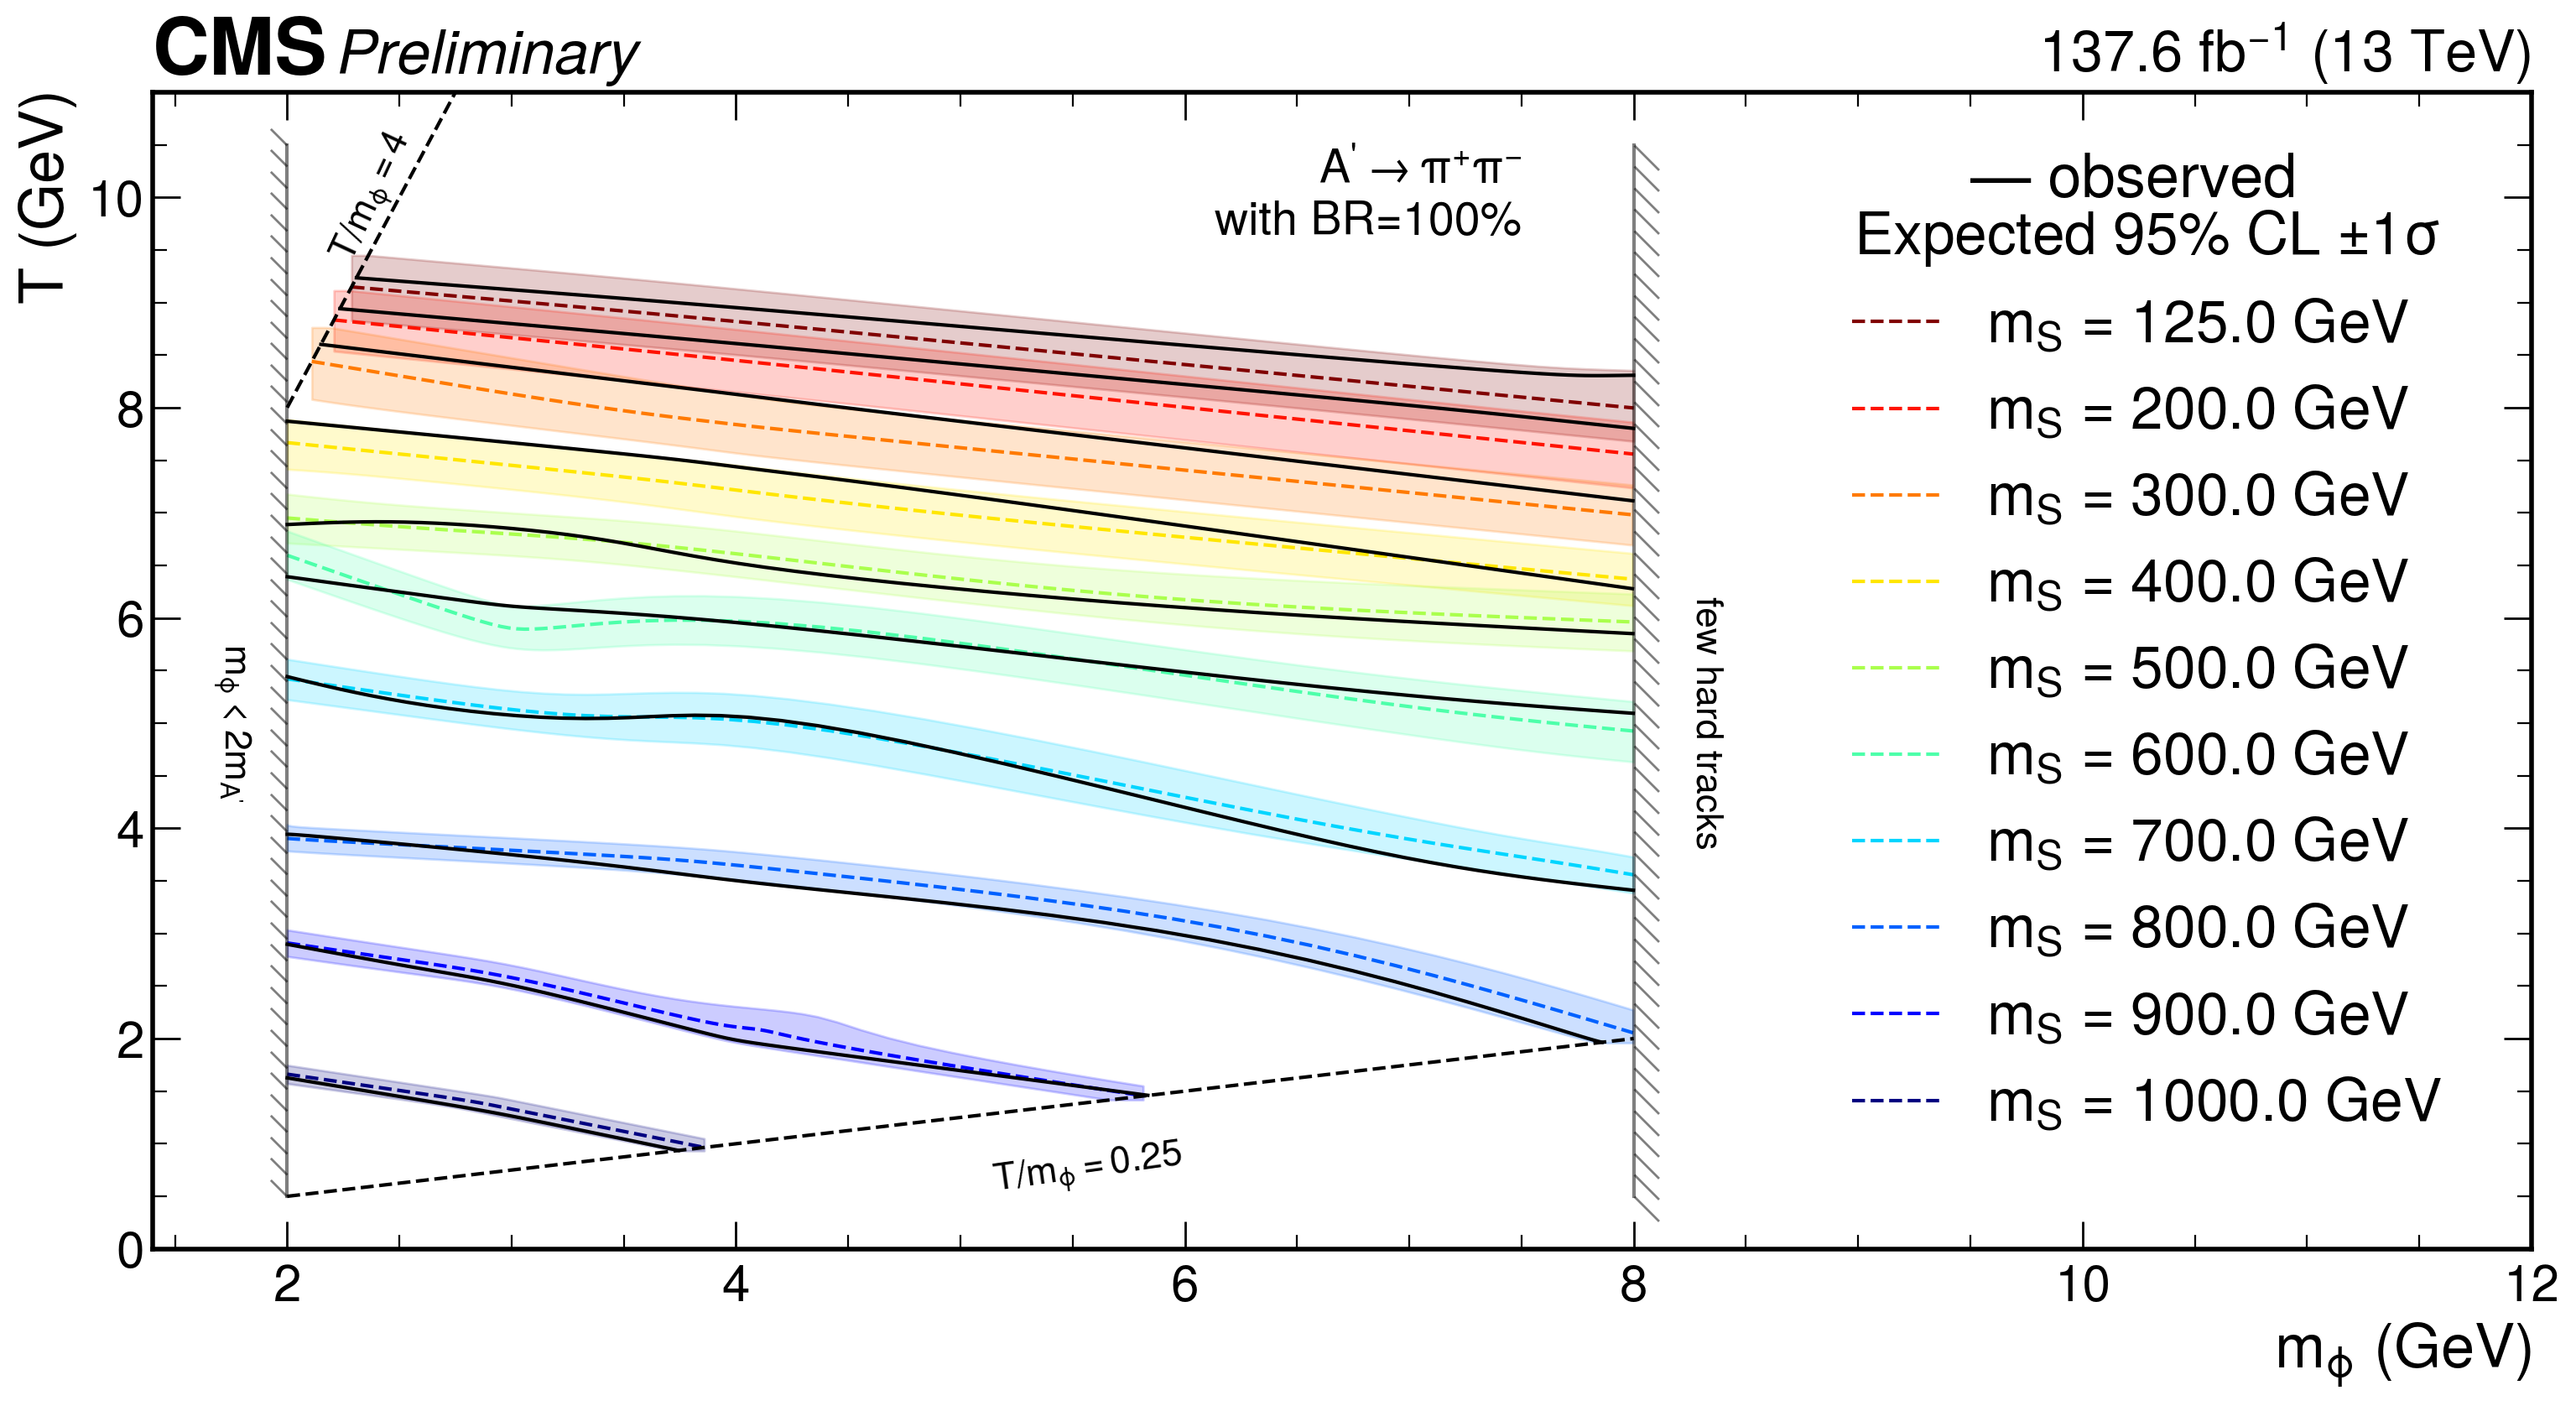

In [7]:
# over-engineered looping over the three decays :)
combinations = plot.get_unique_combinations(['ms','mphi','temp'])

for combination in combinations:
    print(combination)
    try:
        fig = plot.plot_summary_limits_mPhi_temp(decay=combination[0], path=itag)
        plotName = "2D_summary_limits_{}.pdf".format(combination[0])
        fig.savefig(outDir+plotName, bbox_inches='tight')
        plt.show()
    except Exception as e:
        print("Combination failed", e)
    if saveToAN: fig.savefig(outDirAN+plotName, bbox_inches='tight')
    if saveToPaper: fig.savefig(outDirPaper+plotName, bbox_inches='tight')

## Cross Section Limits

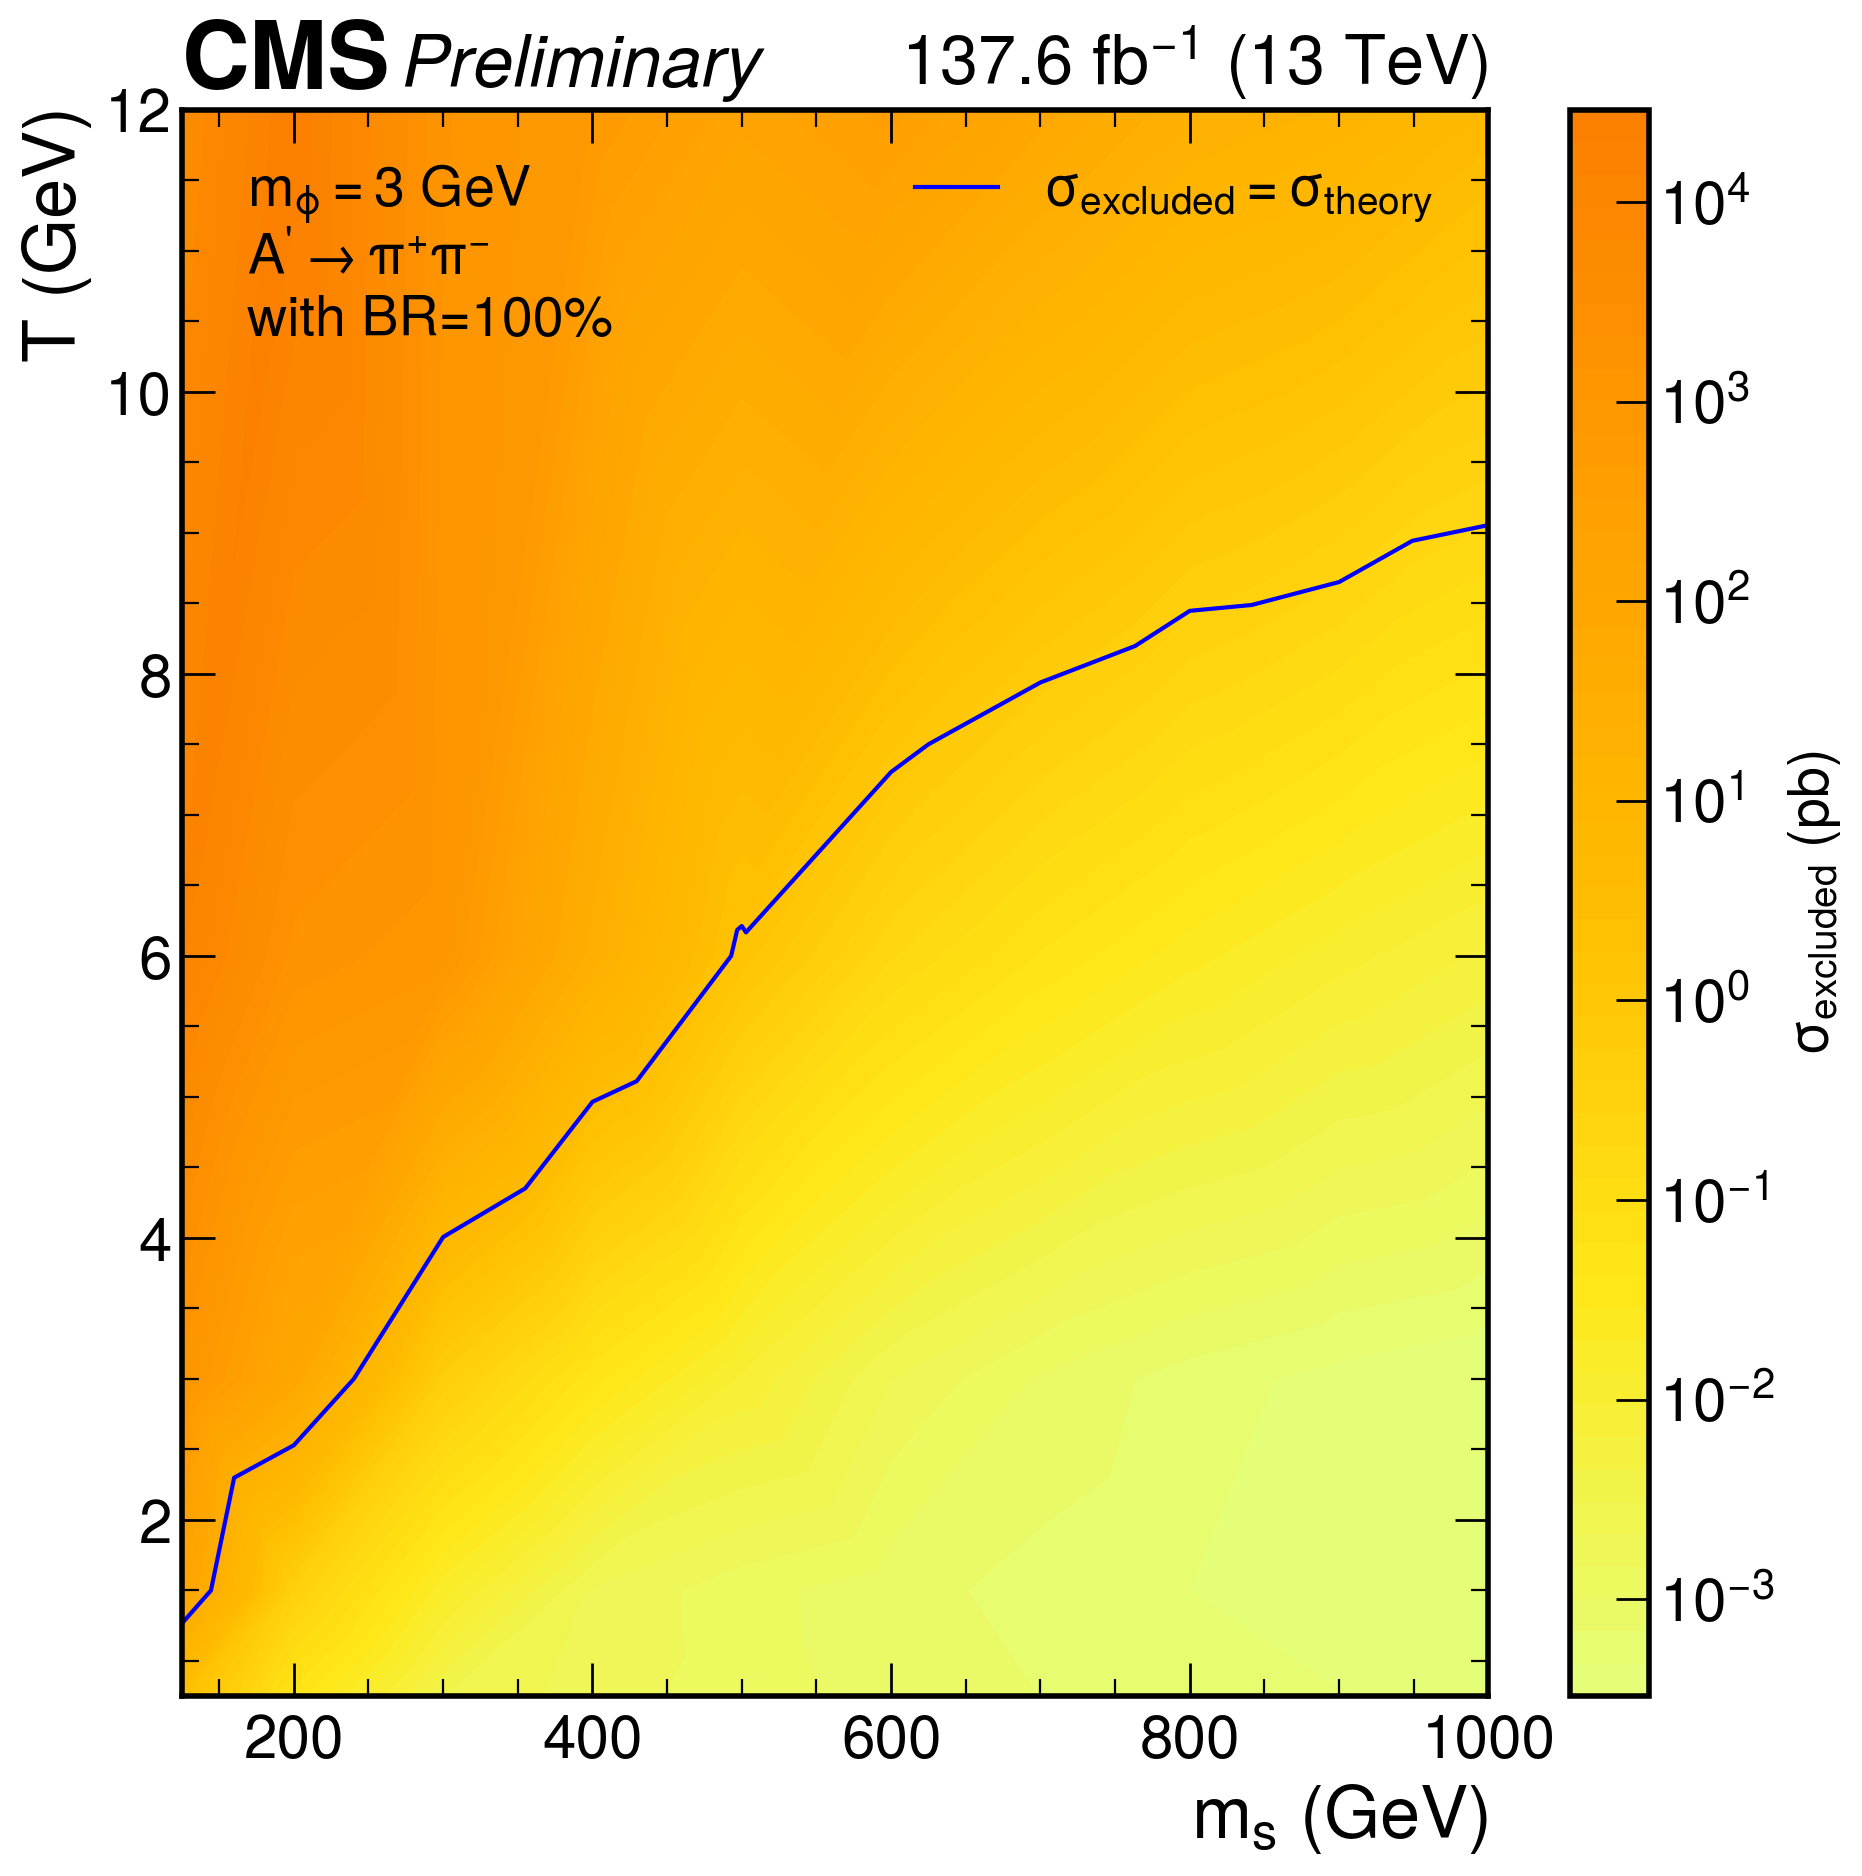

In [9]:
# example usage
fig = plot.plot_xsec_limits(mphi=3, decay='generic', path=itag)

In [21]:
# return all combinations of (mphi, decay)
combinations = plot.get_unique_combinations(['ms', 'temp'])

for i, combination in enumerate(combinations):
    # if i > 3: break # testing
    print(combination)
    try:
        fig = plot.plot_xsec_limits(mphi=combination[0], decay=combination[1], path=itag)
        plotName = "2D_xsec_limits_{}_mPhi{}.pdf".format(combination[1], combination[0])
        fig.savefig(outDir+plotName, bbox_inches='tight')
    except Exception as e:
        print("Combination failed", e)
    if saveToAN: fig.savefig(outDirAN+plotName, bbox_inches='tight')
    if saveToPaper: fig.savefig(outDirPaper+plotName, bbox_inches='tight')

    plt.close()

[1.0, 'leptonic']
[1.4, 'hadronic']
[2.0, 'generic']
[2.0, 'leptonic']
[2.0, 'hadronic']
[3.0, 'generic']
[3.0, 'leptonic']
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T12p0_mS125.000_mPhi3.000_T12.000_modeleptonic_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
[3.0, 'hadronic']
[4.0, 'generic']
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T16p0_mS125.000_mPhi4.000_T16.000_modegeneric_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
[4.0, 'leptonic']
[4.0, 'hadronic']
[8.0, 'generic']
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T32p0_mS125.000_mPhi8.000_T32.000_modegeneric_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T32p0_mS200.000_mPhi8.000_T32.000_modegeneric_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
[8.0, 'leptonic']
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T16p0_mS125.000_mPhi8.000_T16.000_modeleptonic_TuneCP5_13TeV-pythia8.Asympt

## Summary plots: $m_{S}$, T scan with $\mu$=1 lines for each $m_{\phi}$

Bad limits ../approval/higgsCombineGluGluToSUEP_HT1000_T8p00_mS200.000_mPhi2.000_T8.000_modegeneric_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Bad limits ../approval/higgsCombineGluGluToSUEP_HT1000_T8p00_mS900.000_mPhi2.000_T8.000_modegeneric_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Bad limits ../approval/higgsCombineGluGluToSUEP_HT1000_T0p50_mS2000.000_mPhi2.000_T0.500_modegeneric_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Bad limits ../approval/higgsCombineGluGluToSUEP_HT1000_T1p50_mS700.000_mPhi3.000_T1.500_modegeneric_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Bad limits ../approval/higgsCombineGluGluToSUEP_HT1000_T3p00_mS600.000_mPhi3.000_T3.000_modegeneric_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Bad limits ../approval/higgsCombineGluGluToSUEP_HT1000_T6p00_mS125.000_mPhi3.000_T6.000_modegeneric_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Bad limits ../approval/higgsCombineGluGluToSUEP_HT1000_T12p0_mS200.000_mPhi3.000_T12.000_modegeneri

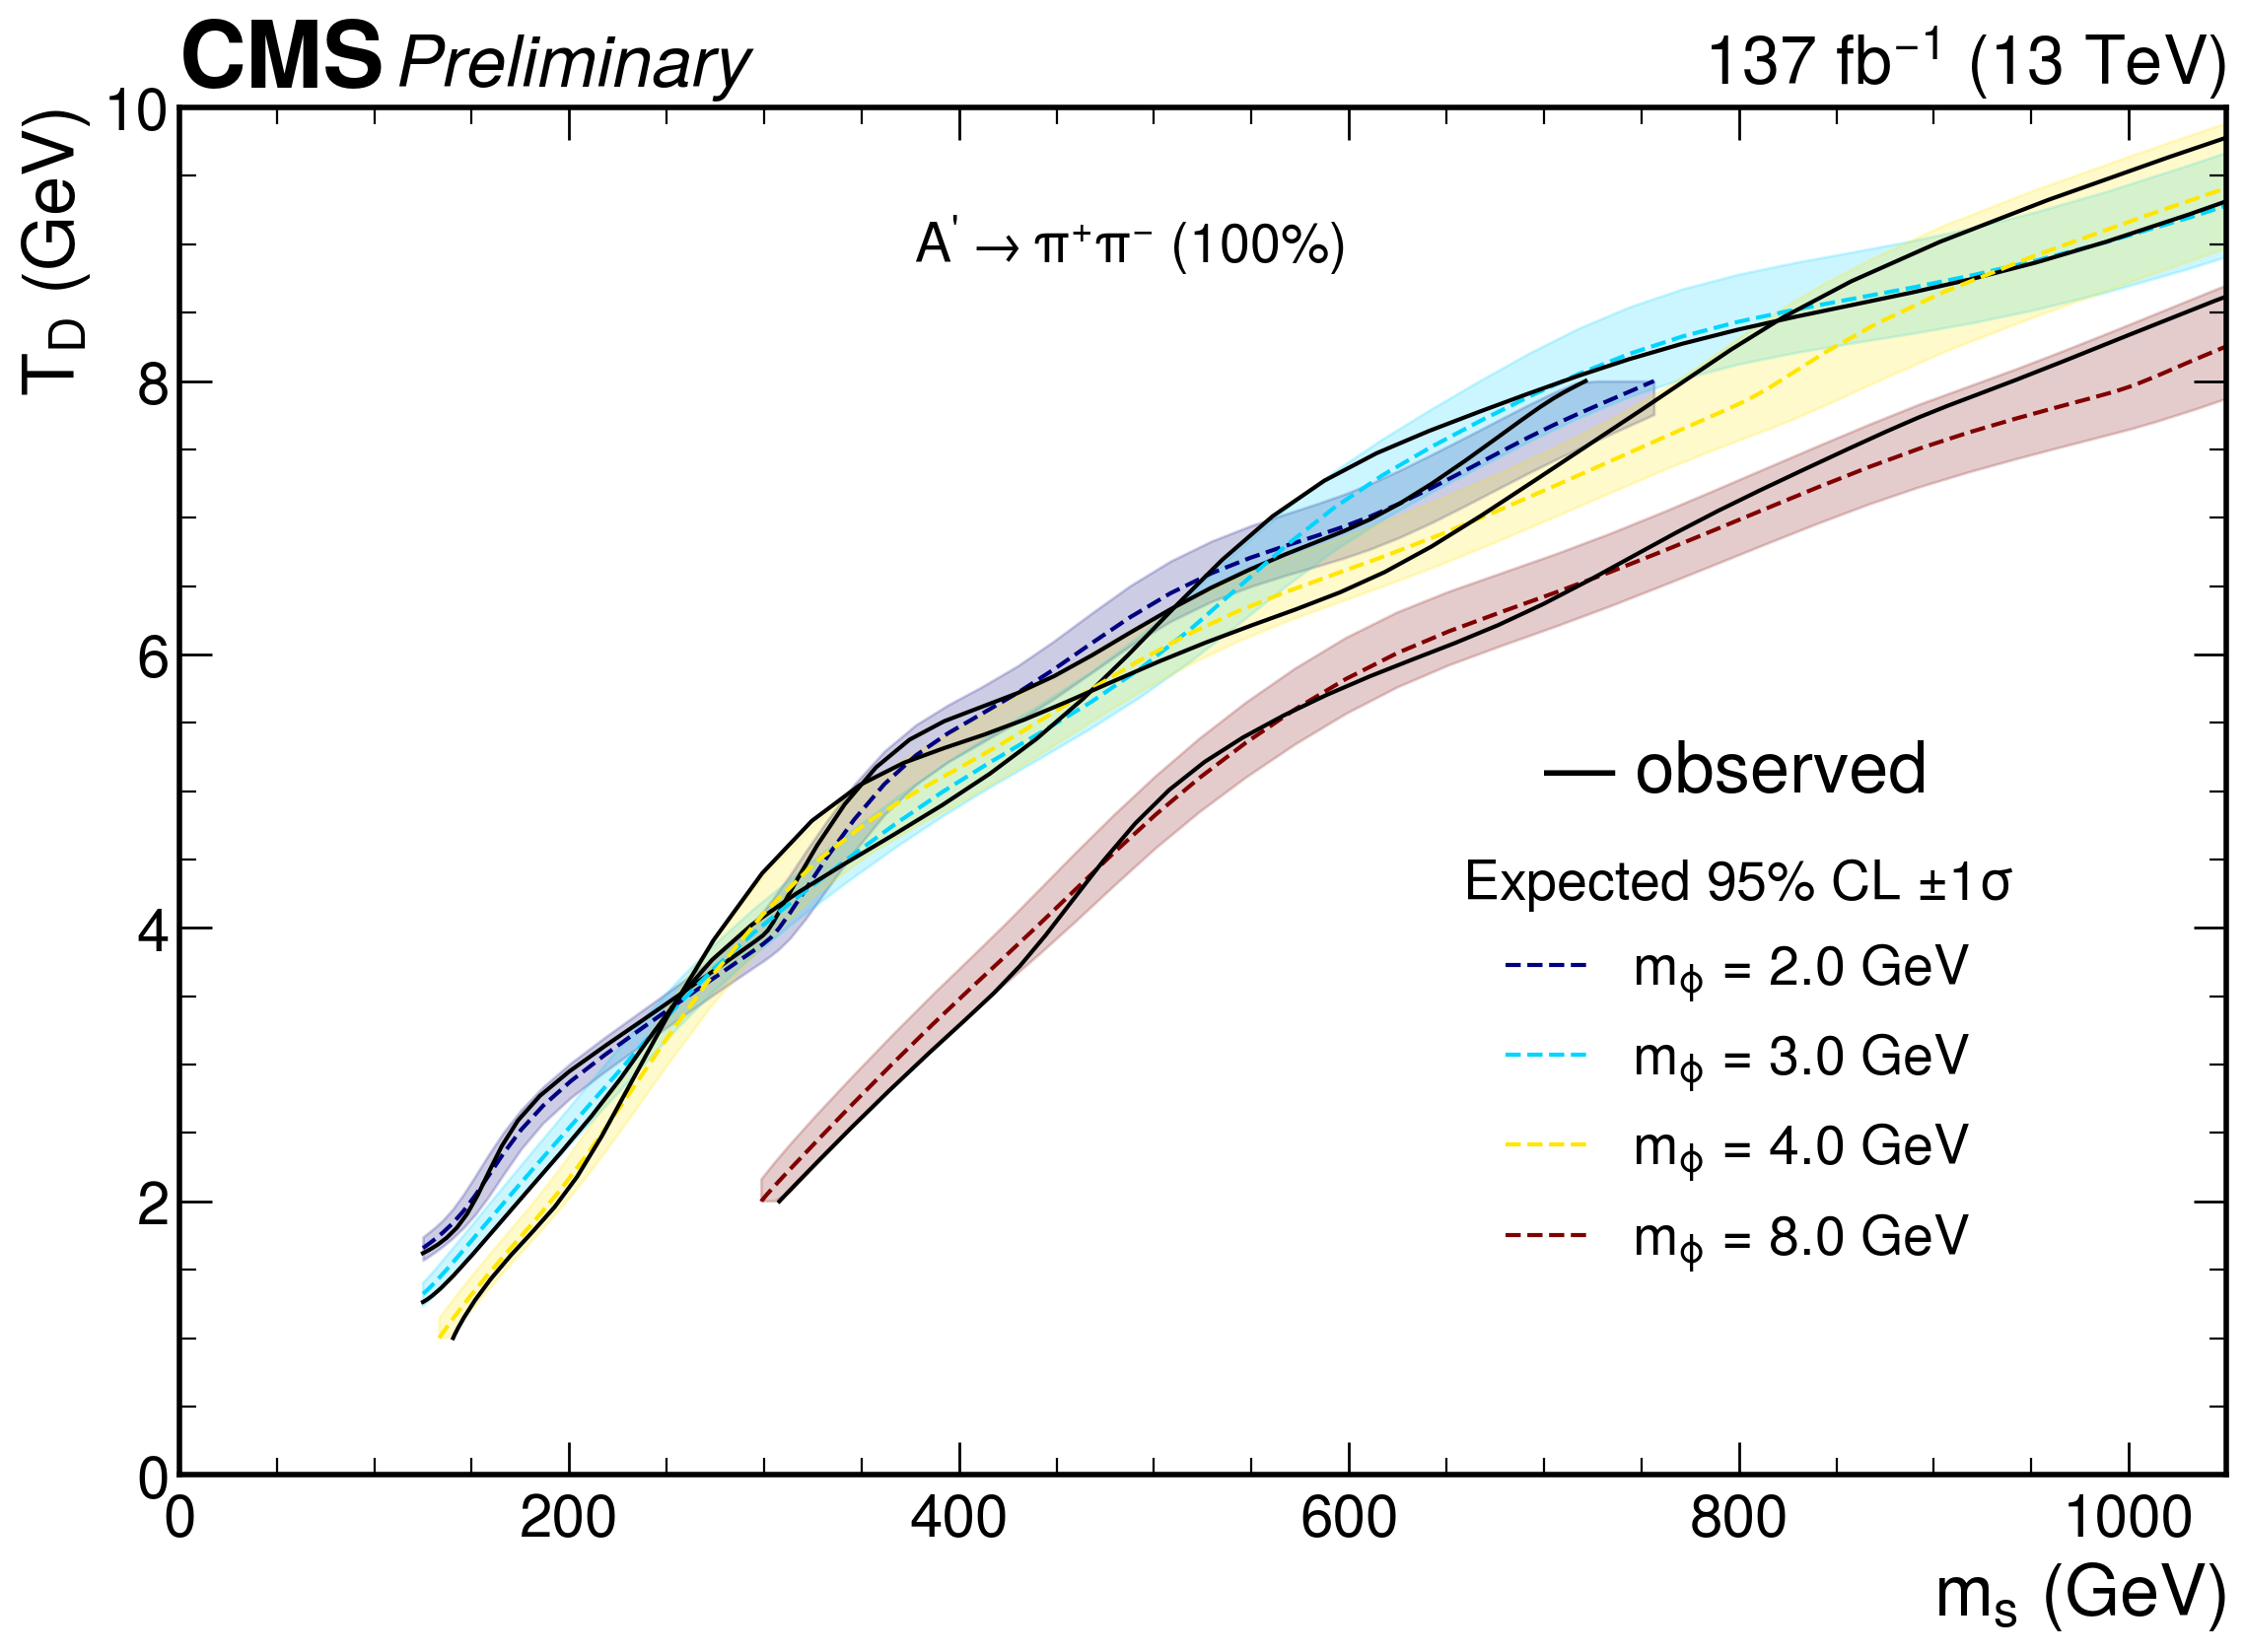

In [13]:
# example usage
fig = plot.plot_summary_limits_mS_temp(decay='generic', path=itag)

['leptonic']
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T12p0_mS125.000_mPhi3.000_T12.000_modeleptonic_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T16p0_mS125.000_mPhi8.000_T16.000_modeleptonic_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T32p0_mS125.000_mPhi8.000_T32.000_modeleptonic_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T32p0_mS200.000_mPhi8.000_T32.000_modeleptonic_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Combination failed [Errno 2] No such file or directory: '/home/submit/lavezzo/public_html/SUEP/analysis/allYears_720_v5/2D_summary_limits_leptonic_mPhi.pdf'
['hadronic']
Bad limits ../allYears_720_v5/higgsCombineGluGluToSUEP_HT1000_T16p0_mS125.000_mPhi8.000_T16.000_modehadronic_TuneCP5_13TeV-pythia8.AsymptoticLimits.mH125.root
Bad limits ../allYears

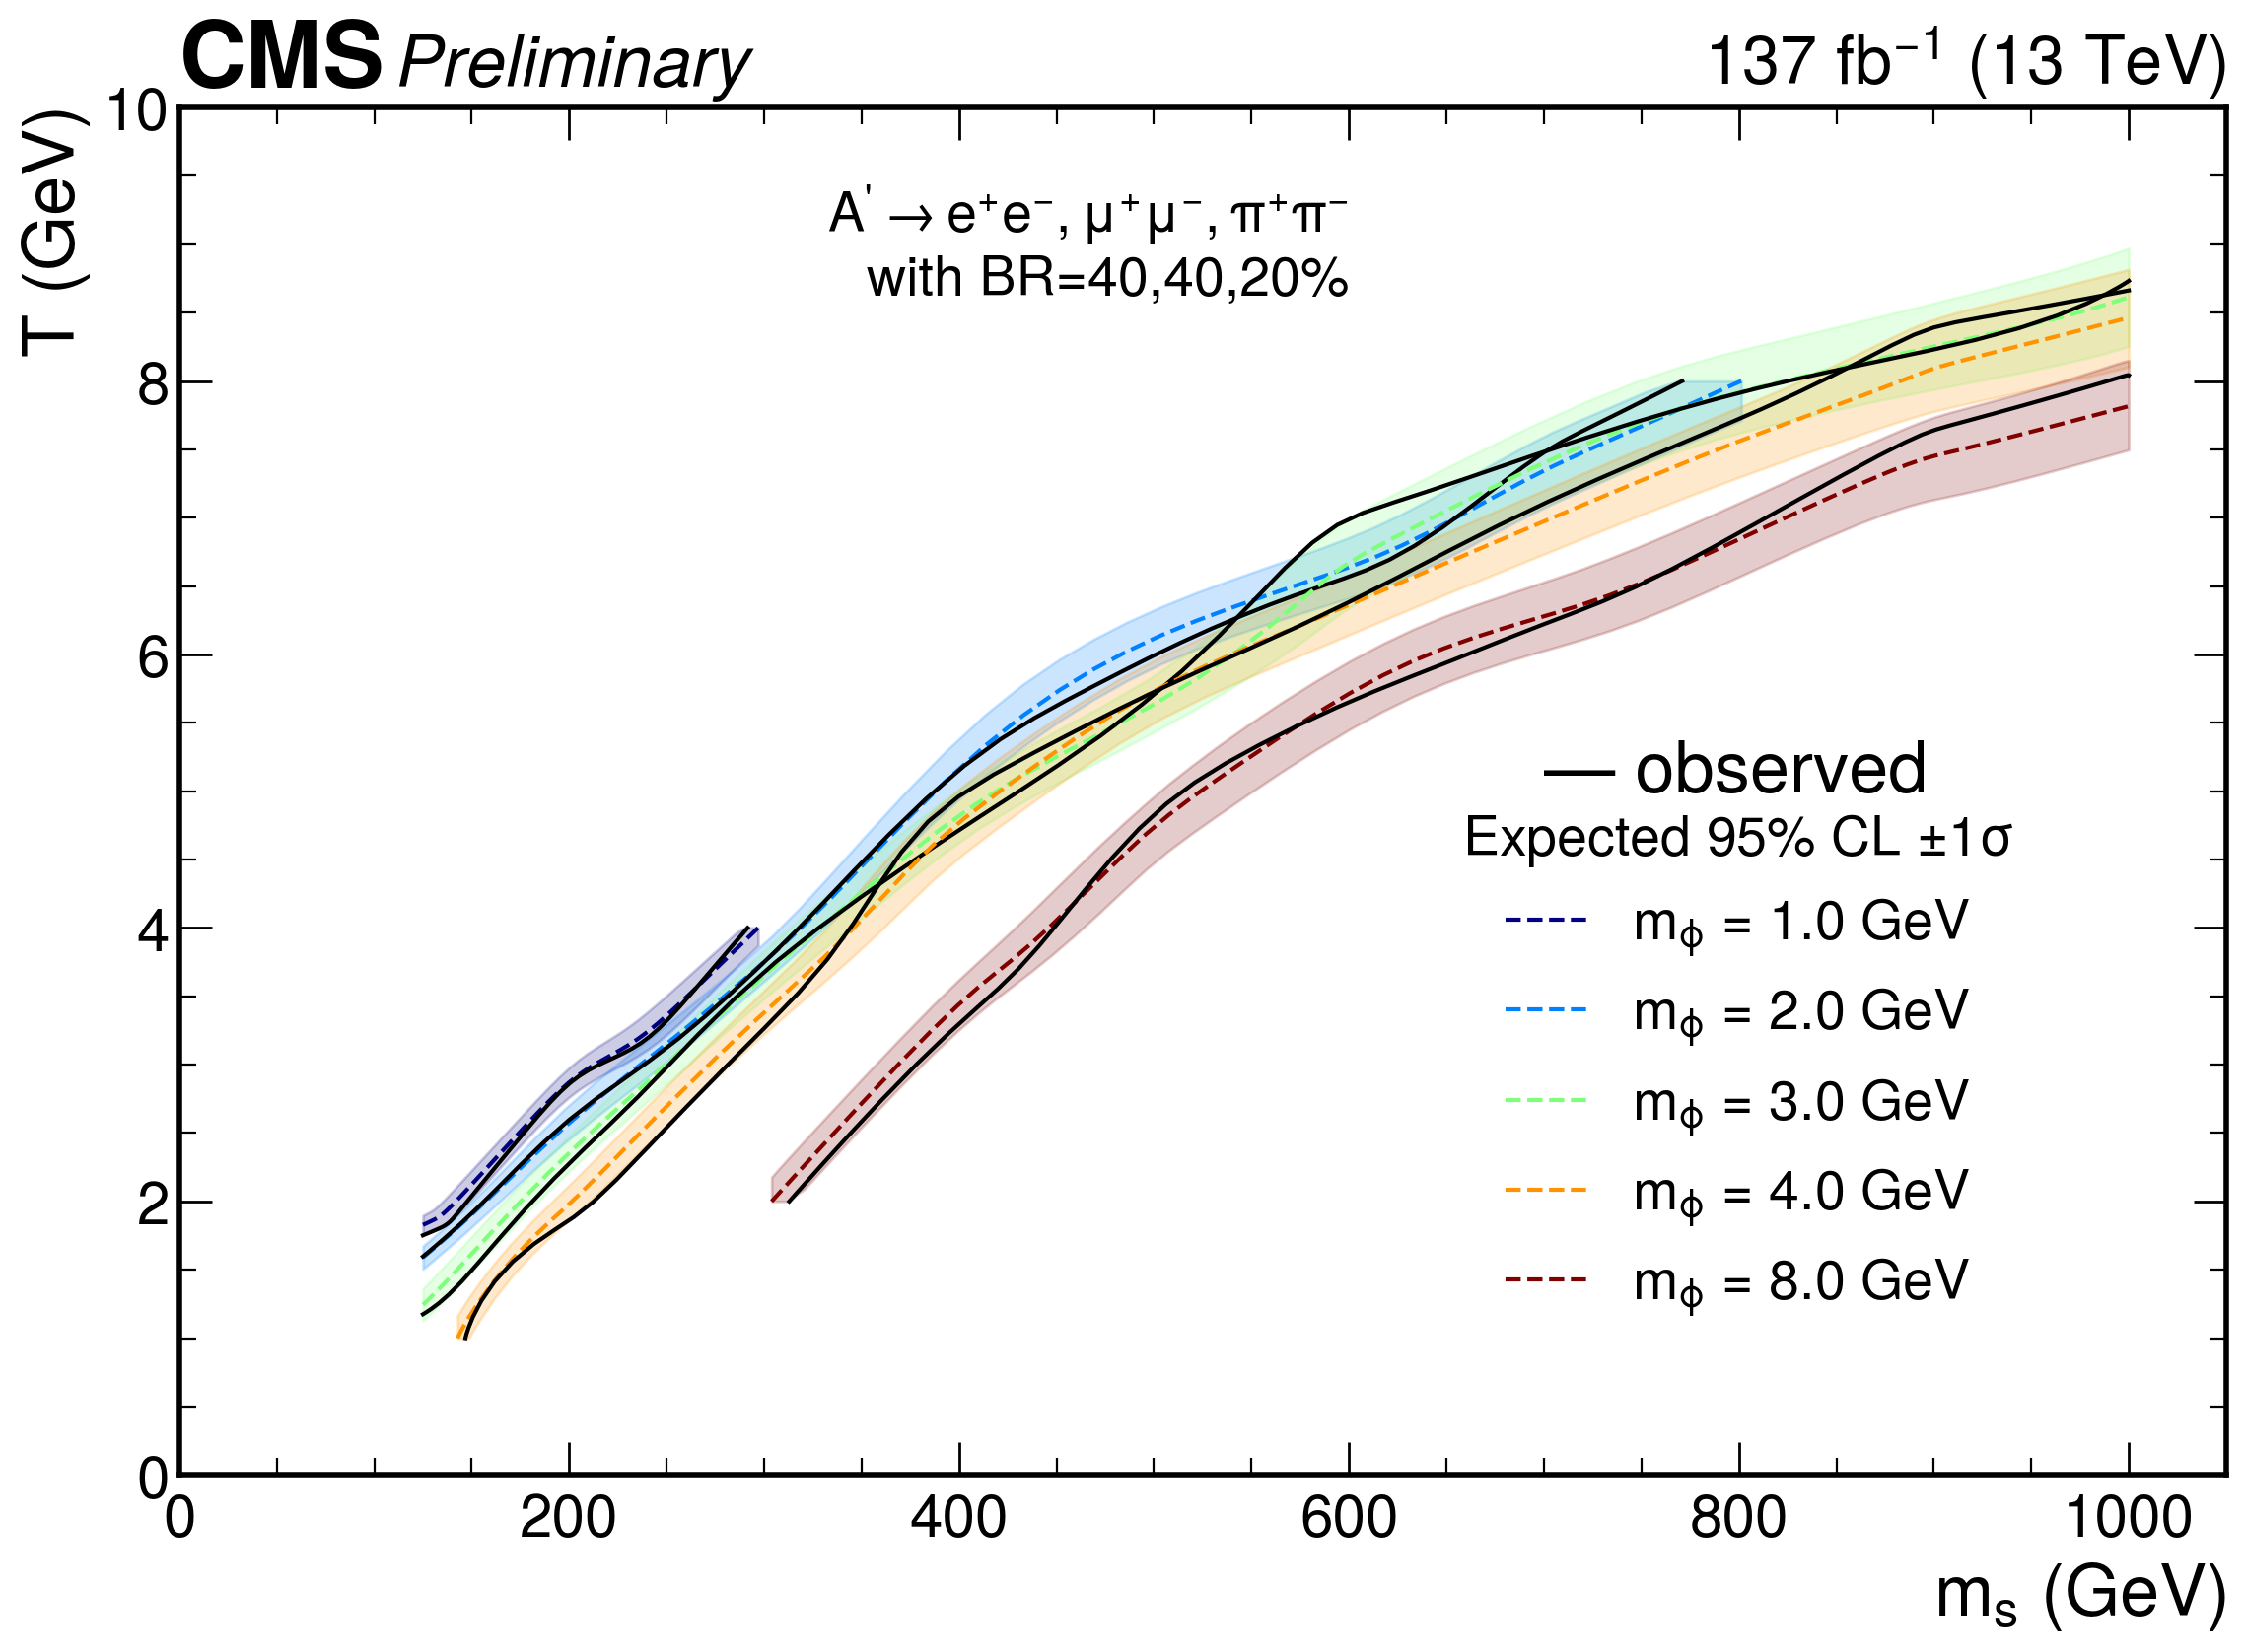

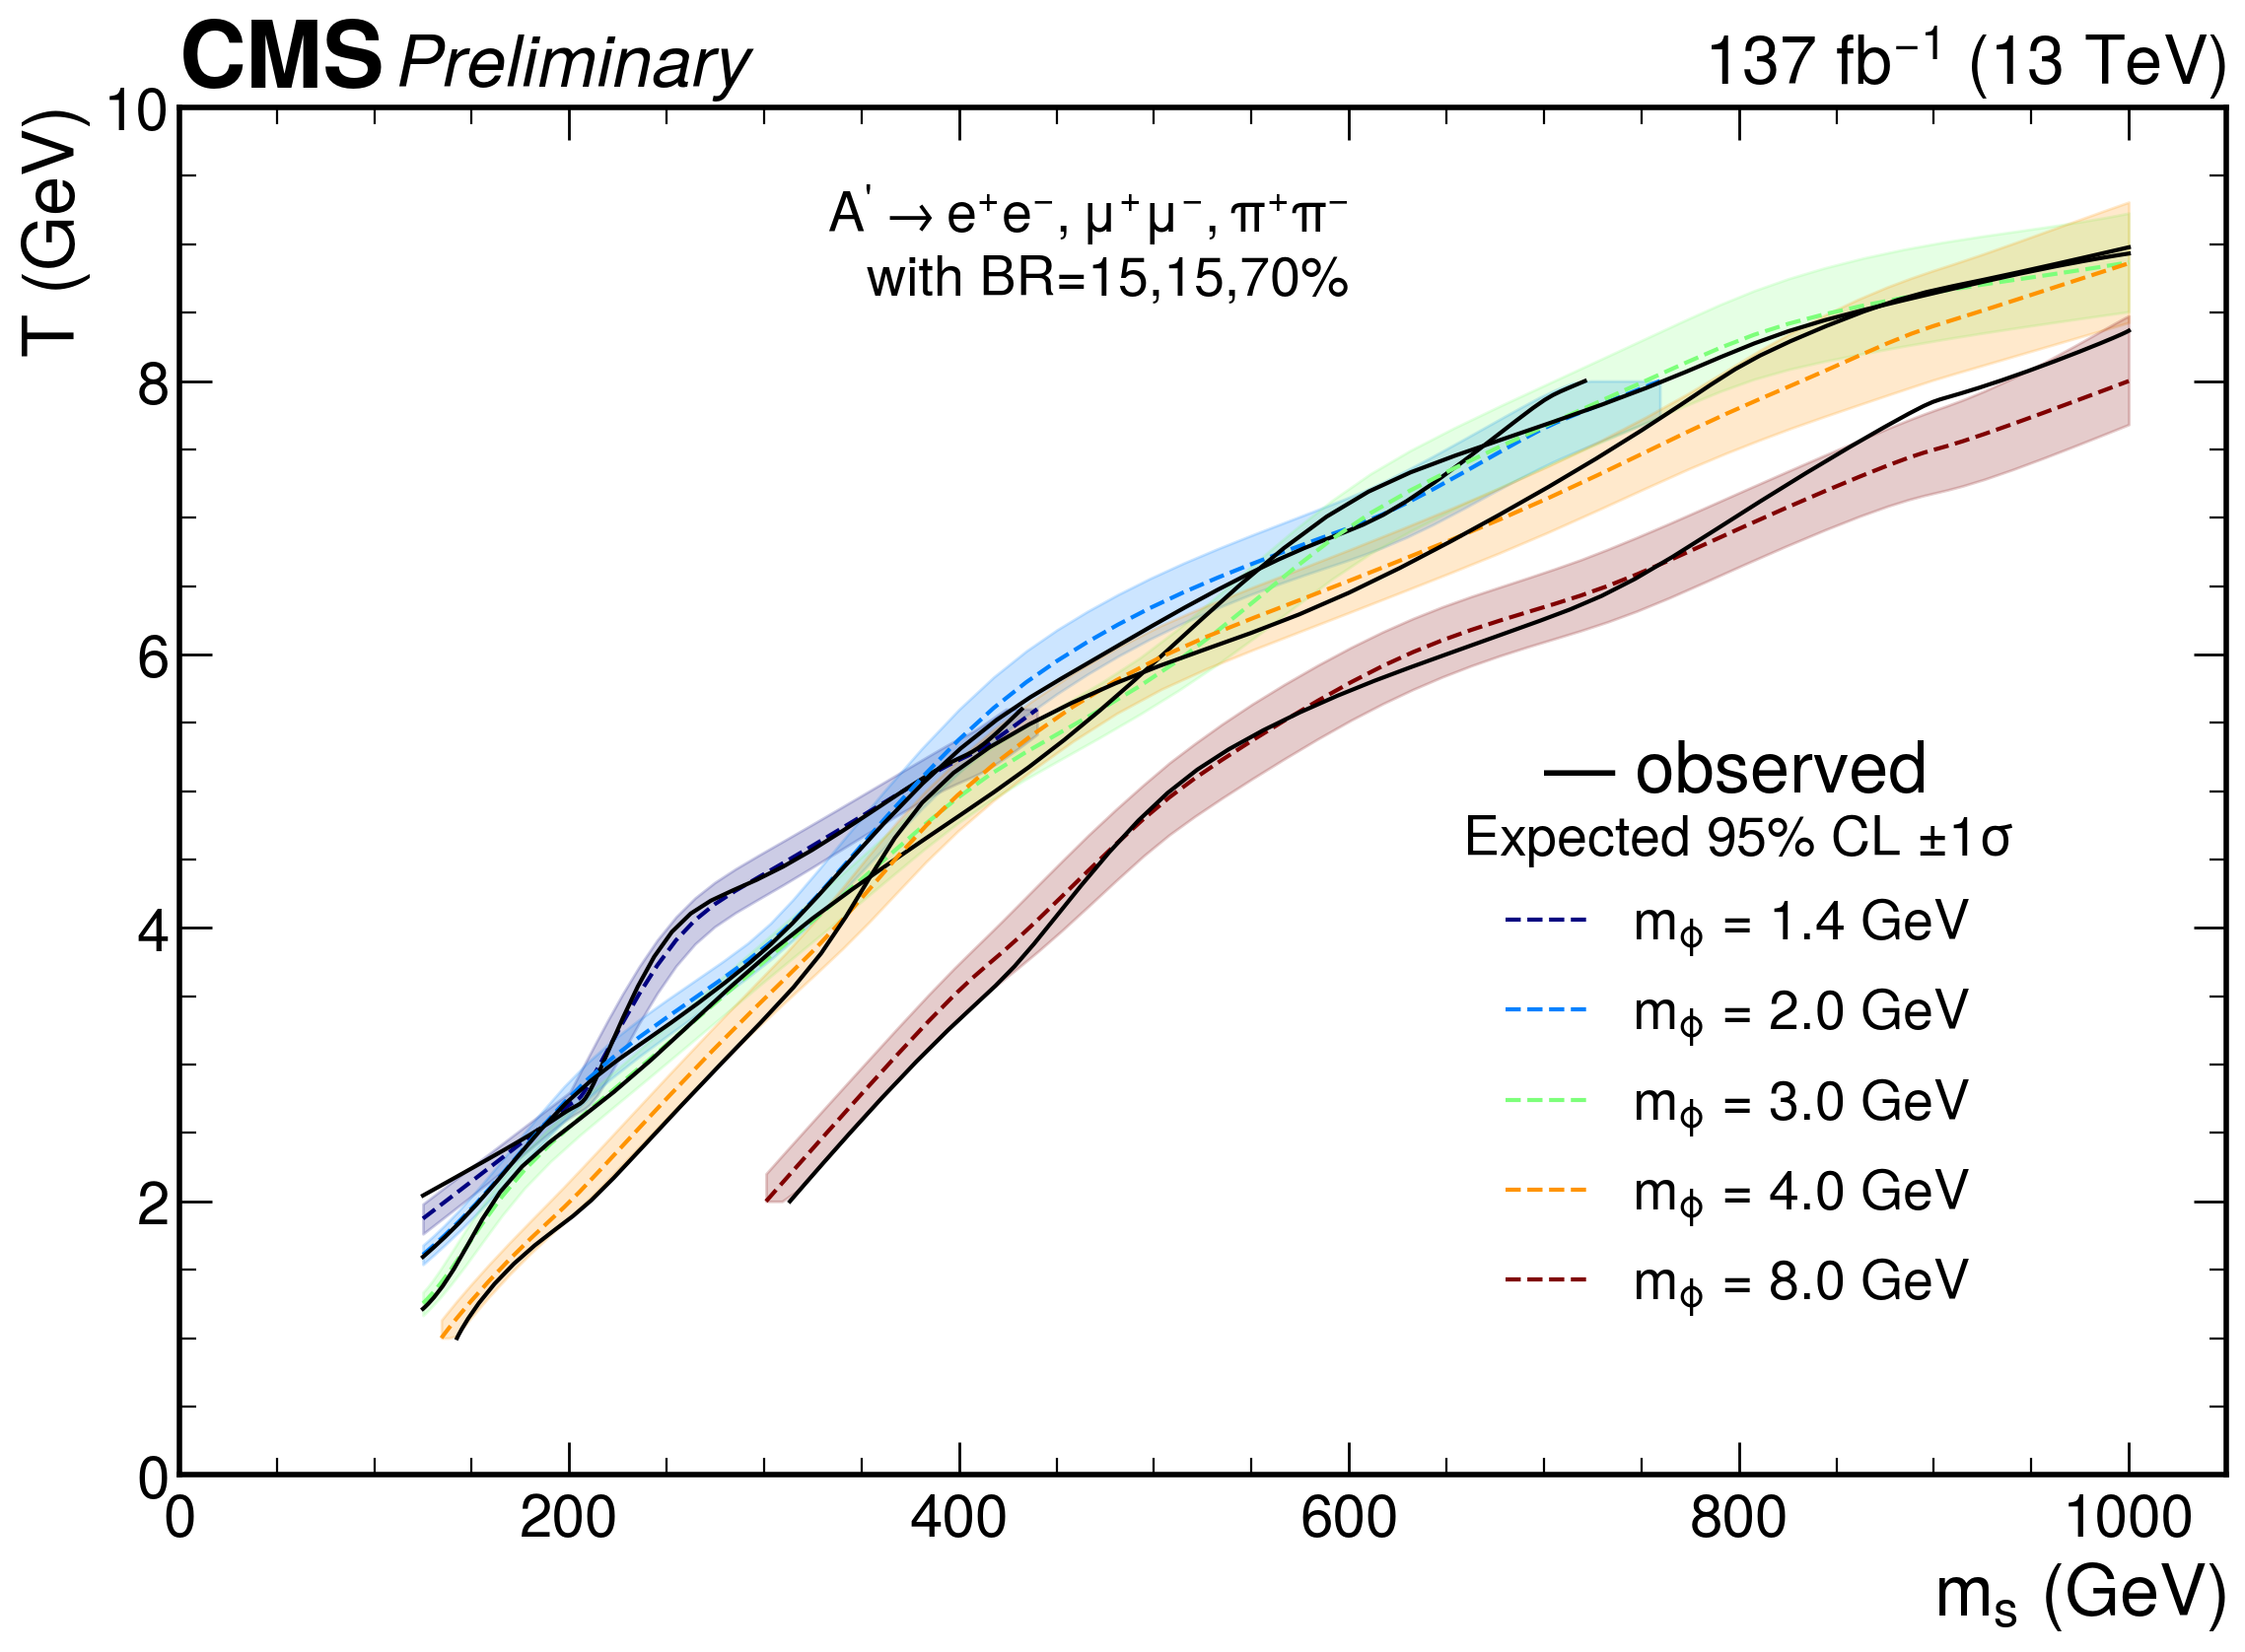

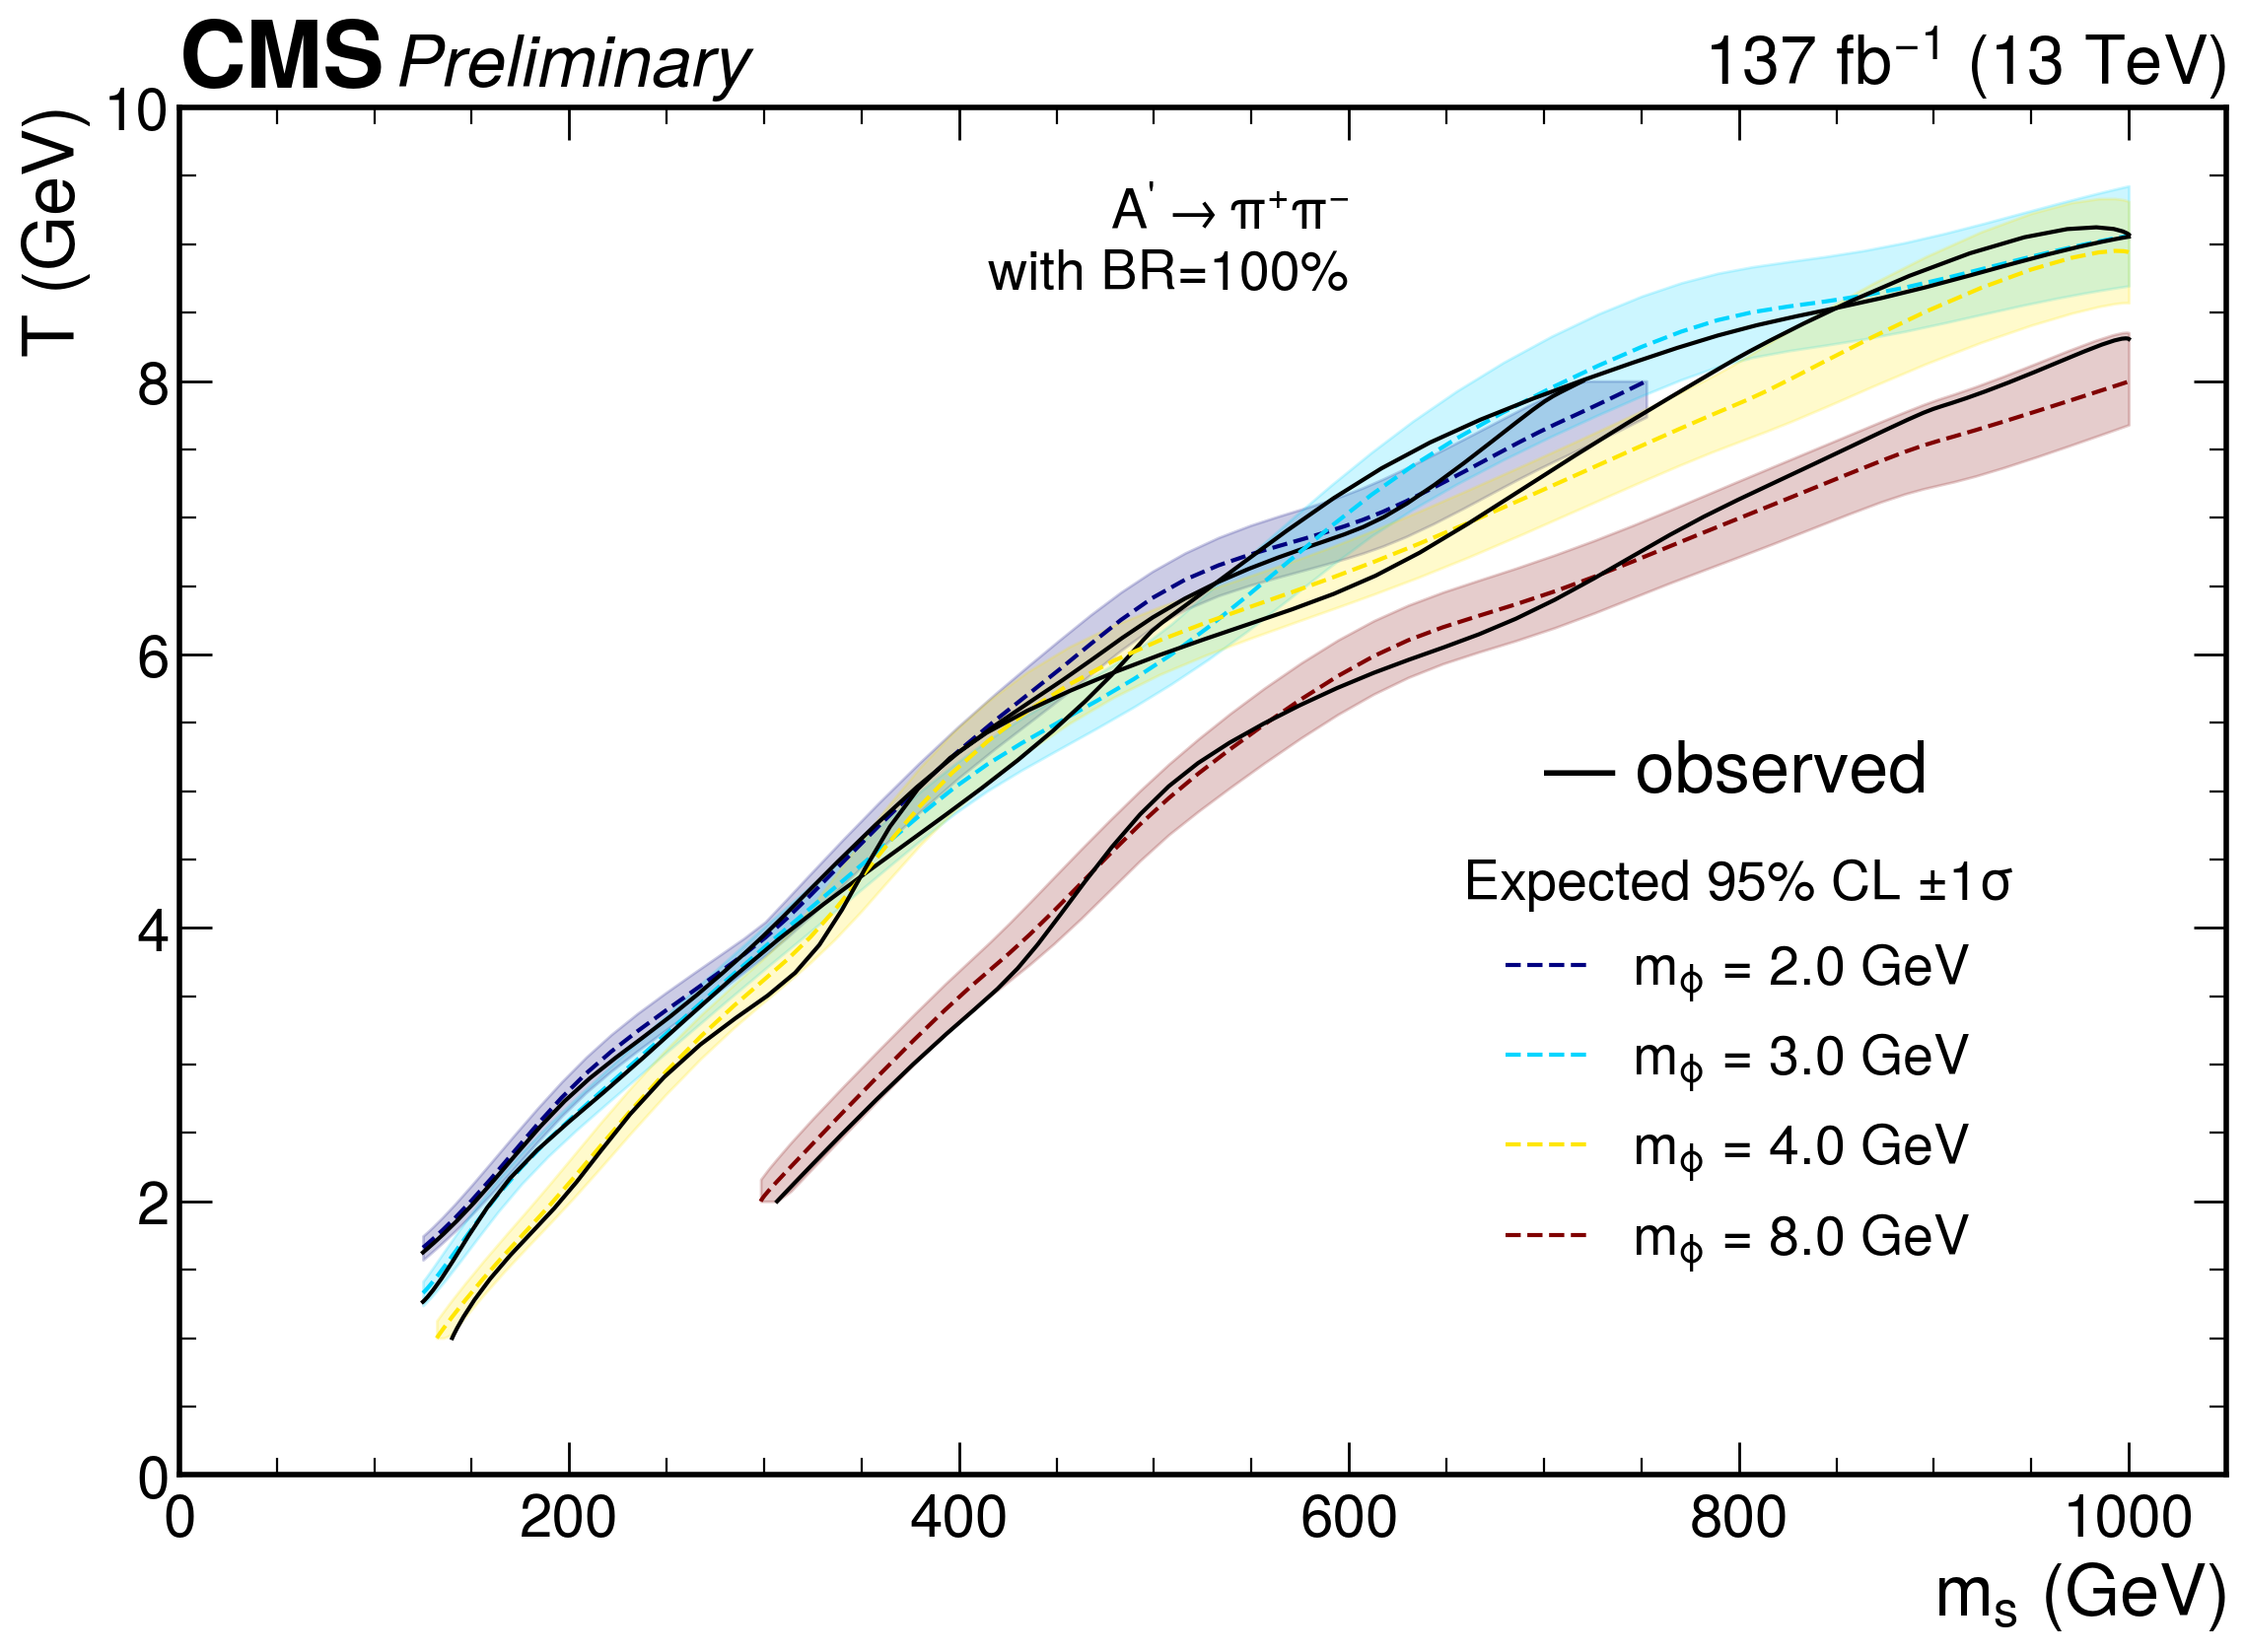

In [8]:
# over-engineered looping over the three decays :)
combinations = plot.get_unique_combinations(['ms','mphi','temp'])

for combination in combinations:
    print(combination)
    try:
        fig = plot.plot_summary_limits_mS_temp(decay=combination[0], path=itag)
        plotName = "2D_summary_limits_{}_mPhi.pdf".format(combination[0])
        fig.savefig(outDir+plotName, bbox_inches='tight')
        plt.show()
    except Exception as e:
        print("Combination failed", e)
    if saveToAN: fig.savefig(outDirAN+plotName, bbox_inches='tight')
    if saveToPaper: fig.savefig(outDirPaper+plotName, bbox_inches='tight')